# Introduction - 

## Interaction between consulates and migrants in events

In this notebook, we explore the nature of the interactions between the consulates and the migrants. For this, we made a description of the different events that were recorded on the cards. For analytical purposes we made a classification into different types: 
* category  administration, 
* consular tasks, 
* employment, 
* financial, 
* health, 
* housing, 
* social assistance, 
* and unknown

All events have a date and a description of the actors (individuals or institutions (or combination)) that were involved with them. The involvement of the actors gives us an impression of the social networks that surrounded the migrants. This will be analysed elsewhere. We will first concern ourselves with the events themselves.

In [10]:
import pandas as pd
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [11]:
steekproef = pd.ExcelFile("/Users/rikhoekstra/surfdrive/emigratie/emigrantenkaarten/migrant_steekproef_masterdb_20180629.xlsx")
steekproef.sheet_names

['emmigrantunits',
 'emcards',
 'emtravels',
 'emwaardeoordeels',
 'emimages',
 'emevents',
 'emactors',
 'emactorinstitutions',
 'lookup_instellingen',
 'emeventtypes',
 'emcardcatalogs',
 'emconsulates',
 'emvervoermiddels',
 'emtypevervoers',
 'emschemas',
 'emlocations',
 'emreligions',
 'orig',
 'reserve']

In [12]:
events = steekproef.parse('emevents')
actors = steekproef.parse('emactors')
actorinst = steekproef.parse('emactorinstitutions')

In [13]:
events

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark,Unnamed: 14
relation,relation,NaN,relation,relation,relation,relation,relation,relation,relation,relation,numeric,numeric,numeric,NaN,NaN
emimages,emmigrantunits,NaN,emmigrantunits,emactors,emactorinstitutions,emmigrantunits,emactors,emactorinstitutions,emactorinstitutions,emeventtypes,NaN,NaN,NaN,NaN,NaN
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,financien,4,11,1954,kapitaalsaanvraag,NaN
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,huisvesting,4,11,1954,formulier aanvraag huis.,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,26,11,1954,Kapitaalsopname toegestaan,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,52,86,financien,18,10,1955,k.o.naar Canberra verzonden,NaN
4_1705,27632,Meene,NaN,NaN,52,NaN,NaN,86,86,financien,20,10,1955,toestemming k.o.,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,25,10,1955,verzonden,NaN
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,NaN,86,consulaire kerntaken,15,2,1956,brief doorgestuurd,NaN
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,arbeid,22,9,1958,verlofreis v.M. naar Ned,NaN


In [14]:
events.drop(events.columns[-1], axis=1, inplace=True)

In [15]:
norms = {'employment':['arbeid'],
         'administration': ['administratie', 'administratief', 'administratie19', 'adminstratie19', 'adminstratief', 'adminstraftief', 'aministraftief', 'aministratief'],
         'health' :['Gezondheid', 'gezondheid', 'gezondeheid', 'gezondneid'],
         'housing': ['huisvesting','Huisvesting'],
         'social assistance': ['maatschappelijke begeleiding','Maatschappelijke begeleiding', 'maatschappeijke begeleiding', 'maatschappelijke begeleidinf', 'maatschappeijle begeleiding'],
         'financial' : ['financieel' , 'Financieel',  'financien', 'Financien'],
         'consular tasks': ['consulaire kerntaken', 'consulaire kerntaak'],
         'unknown': ['onbekend']}

rev_norms = {svalue: key for key, value in norms.items() for svalue in value}
events['n_events'] = events.subject.replace(rev_norms)

In [16]:
subjects = events.pivot_table(columns=['n_events'], 
                              values=['migrant'],
                              aggfunc= len)


In [17]:
df = pd.read_clipboard()
display(HTML(df.to_html()))

,-----BEGIN,CERTIFICATE,REQUEST-----
0,MIIExzCCAq8CAQAwgYExDTALBgNVBAMMBHJpa2gxCzAJBg...,None,None
1,VQQHDAlFaW5kaG92ZW4xDzANBgNVBAoMBnZpZXdlcjEUMB...,None,None
2,YWRtaW4xEDAOBgNVBAsMB0NsdXN0ZXIxFjAUBgNVBAgMDU...,None,None
3,ggIiMA0GCSqGSIb3DQEBAQUAA4ICDwAwggIKAoICAQC4HA...,None,None
4,GQH8i6c0MHlpenRyxZ6GM6DRGlHHtnN1k/TWPyc4YWW5BN...,None,None
5,2MgT89VJloSfvPz4FO8JLY1bQ1bSFLYip+ygGB9lQH3yS1...,None,None
6,SZOx4he2bdG2Ej5eorYorZwpwK9QQV8YdXE1FFPutp3531...,None,None
7,z9g0zdKWLEiy1gnEOb4iQBdC1Ul10T2wd7wiRpfToG9+JW...,None,None
8,2Zm51VoCa8Mjr/IuEffr4L5fgLVqMNleOLsjUHArTgBoW9...,None,None
9,Fvzvf6es8rkJcQSoRJsMA5TNgps8rExW3ZskBd5eQYDA0H...,None,None


Text(0, 0.5, 'number of migrants')

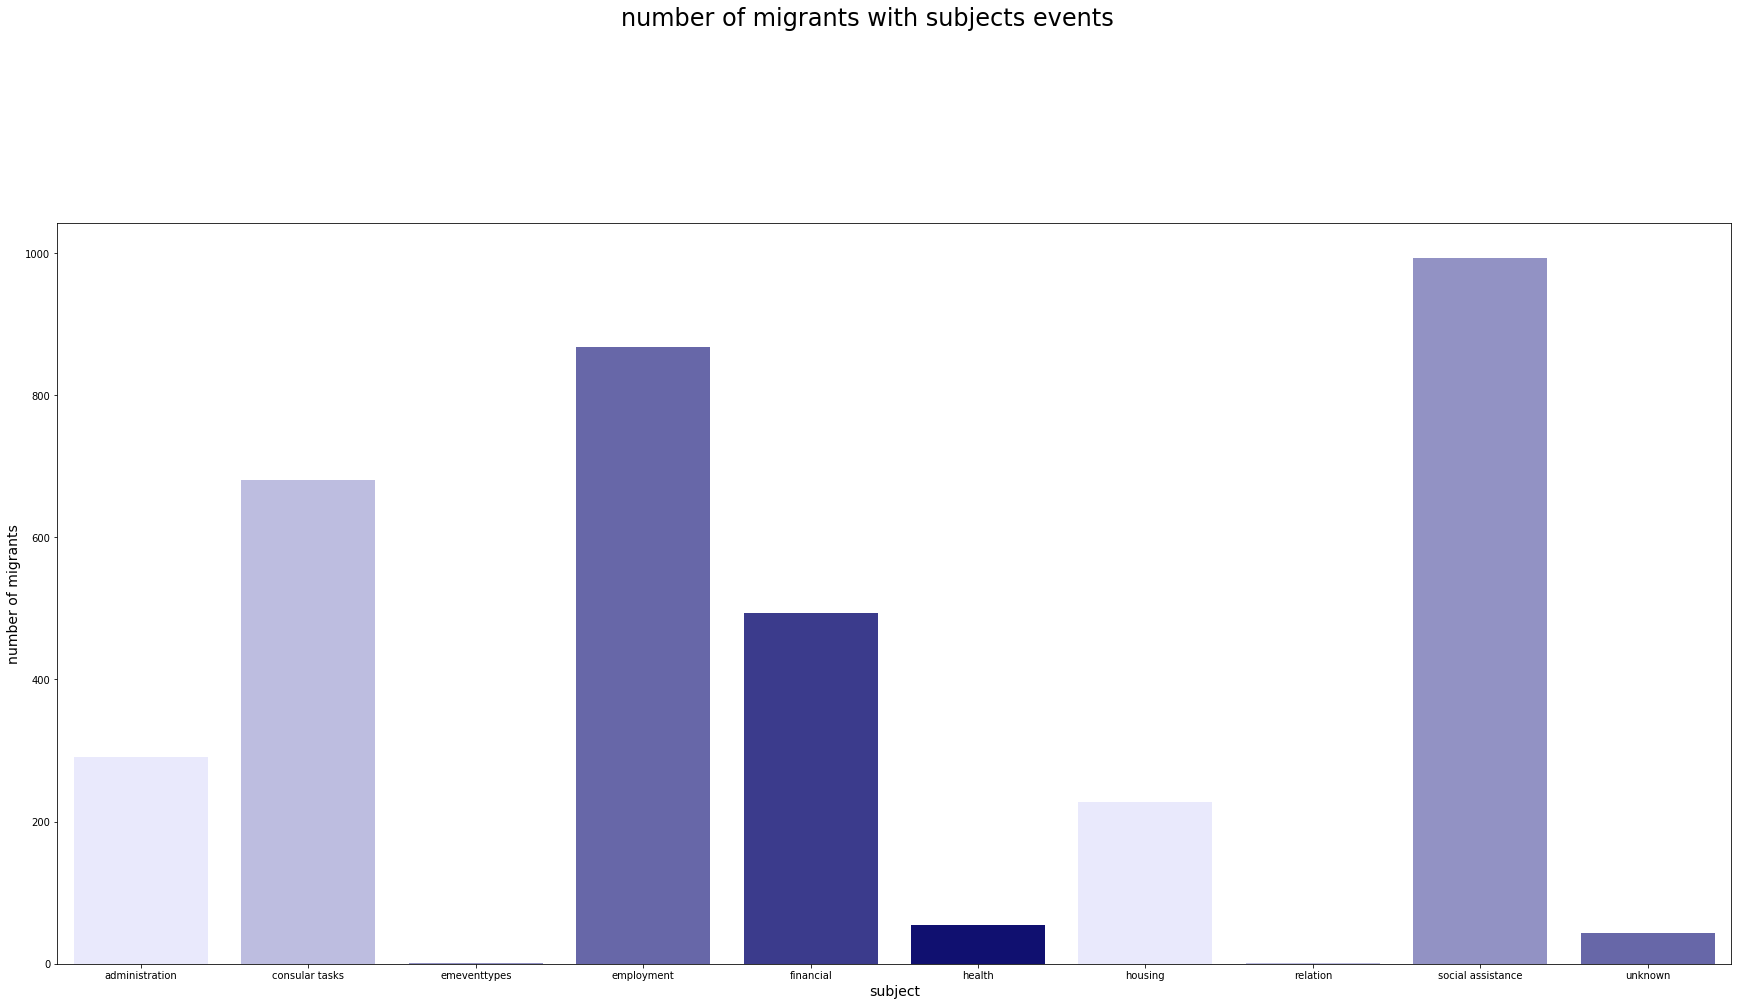

In [18]:
fig = plt.figure(figsize=(30, 30))
fig.suptitle("number of migrants with subjects events",fontsize=24)
pal = sns.light_palette("navy")

ax1 = fig.add_subplot(211)
sns.barplot(data=subjects, palette=pal, ax=ax1)
#subjects.plot.bar(ax=ax1, annot=True)
ax1.set_xlabel('subject', fontsize=14)
ax1.set_ylabel('number of migrants', fontsize=14)


## Types of consulate-migrant interactions - analysis

Most events between consulates and migrants were in the social sphere and concerned social assistance and employment and somewhat less housing. Health issues are rare. More bureaucratic events, originating in the nature of the consulates, were on-going business, as was to be expected. The financial category has different faces as it comprises both the consular tasks of administrating saving for return fare or redemption of debts related to the voyage to Australia, as well the more social assistence to migrants who got into financial trouble, often also related to employment issues.

In [19]:
events.head()

,migrant,Prs_achternaam,actorperson,actorperson.1,actorinstitution,receptorperson,receptorperson.1,receptorinstitution,recording_consulate,subject,day,month,year,remark,n_events
relation,relation,NaN,relation,relation,relation,relation,relation,relation,relation,relation,numeric,numeric,numeric,NaN,relation
emimages,emmigrantunits,NaN,emmigrantunits,emactors,emactorinstitutions,emmigrantunits,emactors,emactorinstitutions,emactorinstitutions,emeventtypes,NaN,NaN,NaN,NaN,emeventtypes
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,financien,4,11,1954,kapitaalsaanvraag,financial
4_1705,27632,Meene,27632,NaN,NaN,NaN,NaN,86,86,huisvesting,4,11,1954,formulier aanvraag huis.,housing
4_1705,27632,Meene,NaN,NaN,86,NaN,NaN,86,86,financien,26,11,1954,Kapitaalsopname toegestaan,financial


In [20]:
events.drop(events.index[:2], inplace=True) #drop superflous rows from spreadsheet
subject_per_year = events.pivot_table(columns=['n_events'], index=['year'], values=['migrant'], aggfunc='count')


In [21]:
subject_per_year = subject_per_year.query('1950 < index <1992')

In [22]:
subject_per_year

migrant                                                     \
n_events administration consular tasks employment financial health housing   
year                                                                         
1951                1.0            NaN        NaN       1.0    NaN     NaN   
1952                1.0            1.0        6.0       1.0    NaN     1.0   
1953                2.0            5.0       26.0       5.0    NaN     2.0   
1954                2.0            8.0       40.0      15.0    6.0    15.0   
1955                5.0           35.0       53.0      36.0    3.0    18.0   
1956               14.0           29.0       78.0      27.0    2.0    35.0   
1957               11.0           20.0       58.0      20.0    2.0    10.0   
1958               16.0           34.0       90.0      33.0   10.0    21.0   
1959               16.0           20.0       55.0      30.0    8.0    27.0   
1960               16.0           28.0       63.0      23.0    2.0    25.0   
1961               19.0           43.0       74.0      26.0    3.0    16.0   
1962               20.0           33.0       54.0      32.0    2.0    13.0   
1963                4.0           31.0       27.0      12.0    NaN     6.0   
1964               19.0           33.0       62.0      64.0    5.0     5.0   
1965                9.0           17.0       32.0      43.0    4.0     7.0   
1966               20.0            9.0       20.0      31.0    NaN     2.0   
1967               19.0           28.0       34.0      25.0    3.0     3.0   
1968               12.0           34.0       19.0      23.0    1.0     4.0   
1969                8.0           24.0       17.0      14.0    1.0     2.0   
1970                6.0           36.0       12.0       7.0    NaN     2.0   
1971                8.0           30.0       12.0       7.0    NaN     4.0   
1972                1.0           10.0        2.0       4.0    1.0     4.0   
1973               12.0           16.0        7.0       NaN    NaN     1.0   
1974                2.0           13.0        1.0       2.0    1.0     NaN   
1975                NaN            5.0        NaN       1.0    1.0     NaN   
1976                5.0            2.0        4.0       NaN    NaN     NaN   
1977                NaN            5.0        NaN       1.0    NaN     NaN   
1978                2.0            6.0        3.0       NaN    NaN     3.0   
1979                7.0           13.0        1.0       NaN    NaN     NaN   
1980                4.0           25.0        NaN       NaN    NaN     1.0   
1981               10.0           41.0       10.0       1.0    NaN     NaN   
1982                2.0           20.0        3.0       3.0    NaN     NaN   
1983                6.0            6.0        1.0       1.0    NaN     NaN   
1984                NaN            6.0        1.0       1.0    NaN     NaN   
1985                2.0            3.0        NaN       NaN    NaN     NaN   
1986                3.0            5.0        NaN       NaN    NaN     NaN   
1987                1.0            5.0        NaN       1.0    NaN     NaN   
1988                3.0            NaN        NaN       NaN    NaN     NaN   
1989                1.0            NaN        NaN       NaN    NaN     NaN   
1991                NaN            NaN        NaN       2.0    NaN     NaN   

                                    
n_events social assistance unknown  
year                                
1951                   NaN     NaN  
1952                   2.0     NaN  
1953                   7.0     NaN  
1954                  29.0     1.0  
1955                  55.0     3.0  
1956                  47.0     NaN  
1957                  49.0     3.0  
1958                  59.0     7.0  
1959                  63.0     4.0  
1960                  80.0     3.0  
1961                  77.0     3.0  
1962                  56.0     1.0  
1963                  48.0     NaN  
1964                  85.0     2.0  
1965                  56.0     1

In [23]:
subject_per_year.to_csv('csvs/subject_per_year.csv', sep="\t")

In [24]:
subject_per_year.columns

MultiIndex(levels=[['migrant'], ['administration', 'consular tasks', 'employment', 'financial', 'health', 'housing', 'social assistance', 'unknown']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]],
           names=[None, 'n_events'])

In [25]:
subject_per_year['migrant']['financial'] # this works

# and the following as well, but we do not use it any further

subject_per_year[subject_per_year['migrant']['financial'] > subject_per_year['migrant']['housing'] ]

migrant                                                     \
n_events administration consular tasks employment financial health housing   
year                                                                         
1953                2.0            5.0       26.0       5.0    NaN     2.0   
1955                5.0           35.0       53.0      36.0    3.0    18.0   
1957               11.0           20.0       58.0      20.0    2.0    10.0   
1958               16.0           34.0       90.0      33.0   10.0    21.0   
1959               16.0           20.0       55.0      30.0    8.0    27.0   
1961               19.0           43.0       74.0      26.0    3.0    16.0   
1962               20.0           33.0       54.0      32.0    2.0    13.0   
1963                4.0           31.0       27.0      12.0    NaN     6.0   
1964               19.0           33.0       62.0      64.0    5.0     5.0   
1965                9.0           17.0       32.0      43.0    4.0     7.0   
1966               20.0            9.0       20.0      31.0    NaN     2.0   
1967               19.0           28.0       34.0      25.0    3.0     3.0   
1968               12.0           34.0       19.0      23.0    1.0     4.0   
1969                8.0           24.0       17.0      14.0    1.0     2.0   
1970                6.0           36.0       12.0       7.0    NaN     2.0   
1971                8.0           30.0       12.0       7.0    NaN     4.0   

                                    
n_events social assistance unknown  
year                                
1953                   7.0     NaN  
1955                  55.0     3.0  
1957                  49.0     3.0  
1958                  59.0     7.0  
1959                  63.0     4.0  
1961                  77.0     3.0  
1962                  56.0     1.0  
1963                  48.0     NaN  
1964                  85.0     2.0  
1965                  56.0     1.0  
1966                  42.0     NaN  
1967                  27.0     NaN  
1968                  22.0     2.0  
1969                  14.0     1.0  
1970                  19.0     5.0  
1971                  25.0     1.0

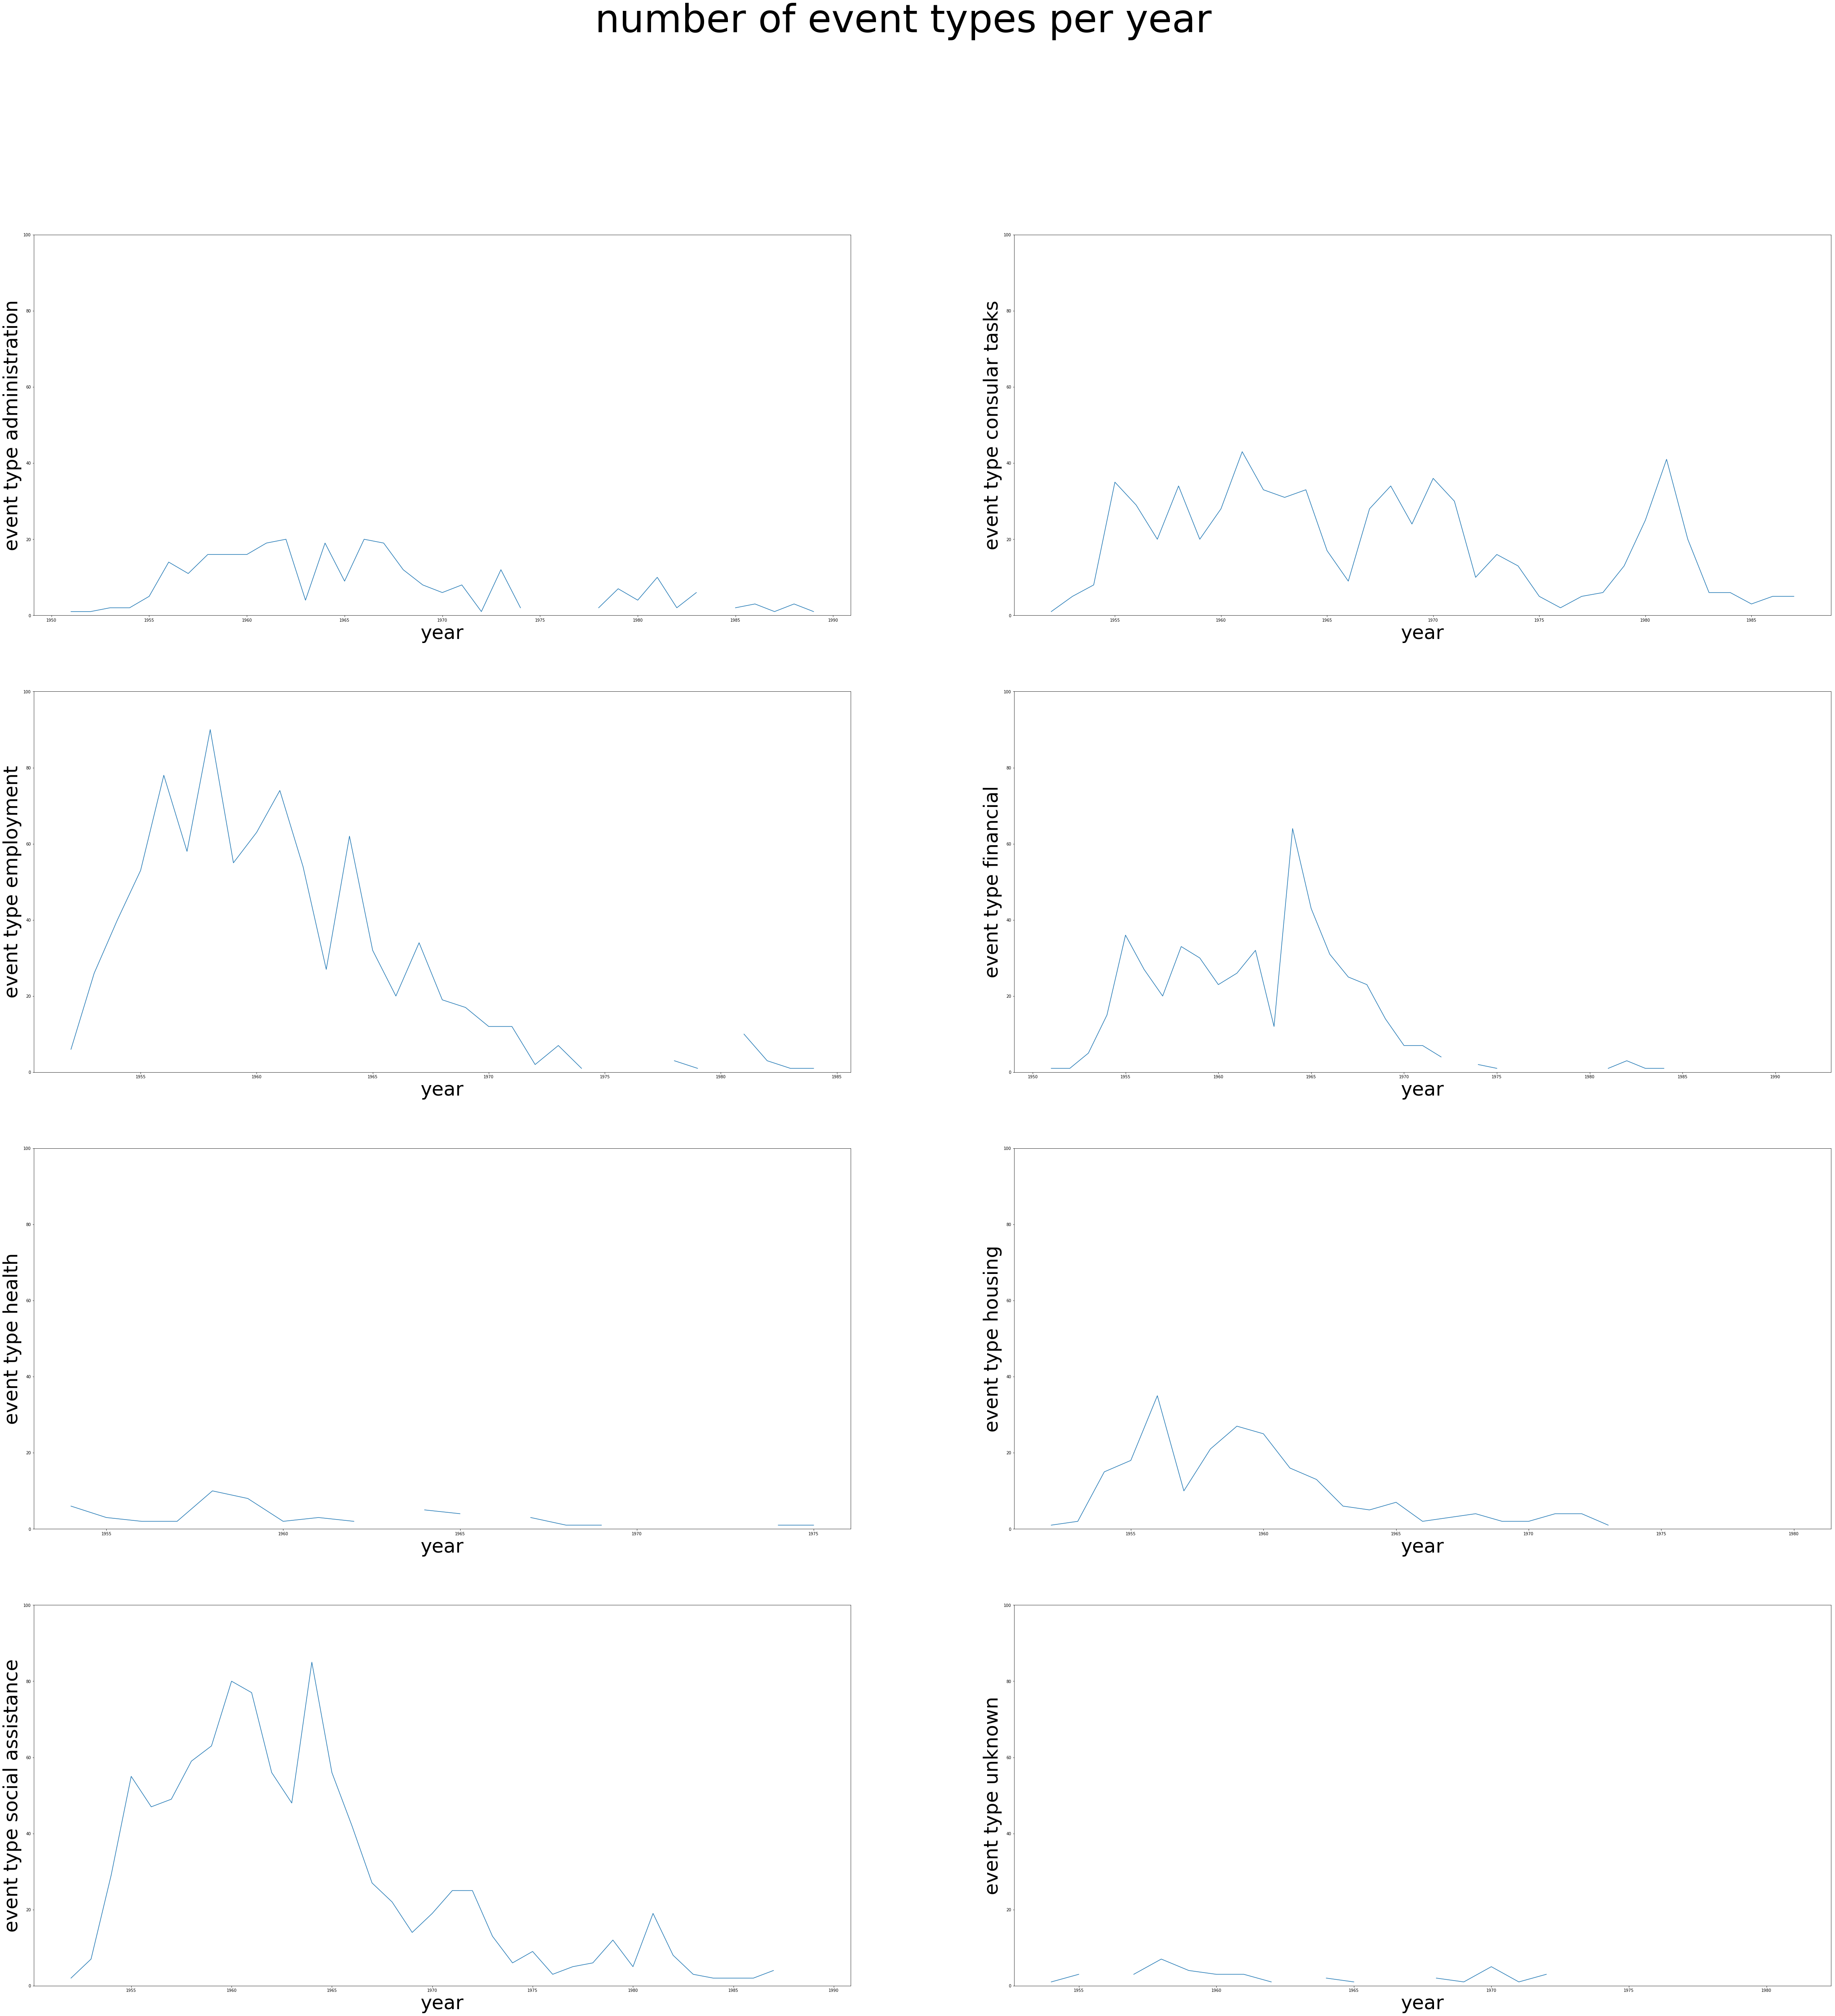

In [26]:
cols = subject_per_year['migrant'].columns
fig, axs = plt.subplots(int(len(cols)/2), 2, figsize=(int(len(cols)*10), 80)) # adjust the geometry based on your number of columns to plot

fig.suptitle("number of event types per year",fontsize=96)


for ax,k in zip(axs.flatten(), cols):
    try:
        if k != np.nan:
            subject_per_year['migrant'][k].plot.line(ax=ax)
            ax.set_ylim(0, 100) # for comparable plots
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('event type {}'.format(k), fontsize=48)
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass


## Migrant events over time - analysis

The different types of migrant-consulate interaction analysed above have been plotted in time against a constant y-axis. The total amount of events does not change, of course. The overall number of events decreased over time. This is in line with the decrease of the number of migrants to Australia, but not entirely the same, as the date of the cards is the beginning date, while it only marks the beginning of the interaction between consulates and migrants. This leads to some observations:

* The institutional activities of the consulates (consular tasks) remained constant over time, with a peak in the early 1980s 
* there was a peak in the financial events around 1965 
* social issues, employment and housing occupied the consulates mainly in the late 1950s and early 1960s

In [27]:
subjects_per_migrant = events.pivot_table(index=['migrant'], columns=['n_events'], values=['Prs_achternaam'], aggfunc='count')


In [28]:
subjects_per_migrant.head()

Prs_achternaam                                                     \
n_events administration consular tasks employment financial health housing   
migrant                                                                      
96                  1.0            1.0        2.0       1.0    1.0     NaN   
178                 NaN            3.0        1.0       NaN    NaN     NaN   
321                 NaN            1.0        NaN       NaN    NaN     NaN   
405                 NaN            NaN        NaN       NaN    NaN     2.0   
433                 NaN            NaN        NaN       NaN    NaN     1.0   

                                    
n_events social assistance unknown  
migrant                             
96                     2.0     NaN  
178                   10.0     NaN  
321                    NaN     NaN  
405                    NaN     NaN  
433                    2.0     NaN

In [29]:
finc = subjects_per_migrant[subjects_per_migrant['Prs_achternaam']['financial'] > 1].index
list(finc)

[624,
 919,
 1340,
 2863,
 3710,
 4612,
 4835,
 4928,
 5819,
 5918,
 6451,
 7459,
 7857,
 8378,
 8591,
 8671,
 9018,
 9093,
 10053,
 10834,
 12859,
 13222,
 14159,
 14594,
 15098,
 15392,
 16674,
 17054,
 17343,
 18066,
 18988,
 19083,
 19463,
 19831,
 19962,
 19965,
 20146,
 20969,
 22345,
 22766,
 23089,
 23189,
 23287,
 23713,
 25062,
 25256,
 26900,
 26994,
 27519,
 27632,
 28781,
 29855,
 30393,
 33146,
 34456,
 38076,
 38165,
 38369,
 38405,
 39304,
 42034,
 42645,
 44289,
 45525,
 47065,
 48310,
 50561,
 50585,
 50947,
 51330]

In [30]:
scored_m = pd.read_csv('csvs/scored_pers.csv', sep="\t")
scored_m.head()

,Unnamed: 0,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,...,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas,province
0,0,34120.0,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,...,3,catholic,medium,Family,34120,1956,24,20-30,NAMA,Gelderland
1,1,46567.0,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,...,1,catholic,empty,Alone,46567,1955,22,20-30,NAMA,North Holland
2,2,3053.0,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,...,7,catholic,dense,Family,3053,1958,44,40-50,NAMA,Gelderland
3,3,3053.0,3053.0,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,...,7,NaN,dense,Couple,3053,1958,44,40-50,LP,North Holland
4,4,5515.0,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,...,4,protestant,large,Couple,5515,1953,61,50-60,LP,North Holland


In [31]:
scored_m.query("persoonsId == 96")

,Unnamed: 0,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,...,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas,province
422,422,96.0,96.0,D.O.,van,Acquoy,1929,Uithoorn,NaN,NAMA,...,1,protestant,empty,Couple,96,1955,26,20-30,NAMA,NaN


In [32]:
list(finc) 
finan = scored_m.loc[scored_m.persoonsId.isin(list(finc))]
finan


,Unnamed: 0,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,...,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas,province
8,8,4612.0,4612.0,Th.,van den,Dolder,1916,Lonneker,Almelo,NAMA,...,12,protestant,dense,Family,4612,1957,41,30-40,NAMA,Limburg
9,9,4612.0,4612.0,Th.,vd,Dolder,1916,NaN,Almelo,NAMA,...,12,no_religion,dense,Family,4612,1957,41,30-40,NAMA,North Holland
16,16,1340.0,1340.0,A.P.A.,NaN,Berbee,1920,NaN,Amsterdam,LP,...,1,catholic,empty,Alone,1340,1954,34,30-40,LP,North Holland
20,20,5918.0,5918.0,A.,NaN,Fuijkschot,1943,NaN,Amsterdam,NaN,...,18,protestant,dense,Alone,5918,1966,23,20-30,other,North Holland
21,21,5918.0,5918.0,A.,NaN,Fuijkschot,1943,Amsterdam,Purmerend,JP,...,18,protestant,dense,Alone,5918,1966,23,20-30,JP,North Holland
22,22,5918.0,5918.0,A.,NaN,Fuijkschot,1943,Amsterdam,NaN,JP,...,18,protestant,dense,Alone,5918,1966,23,20-30,JP,North Holland
38,38,33146.0,33146.0,W.,NaN,Beijer,1938,NaN,Amsterdam,NaN,...,21,no_religion,dense,Couple,33146,1963,25,20-30,other,North Holland
39,39,33146.0,33146.0,W.,NaN,Beijer,1938,NaN,Amsterdam,JP,...,21,unknown,dense,Alone,33146,1963,25,20-30,JP,North Holland
40,40,33146.0,33146.0,W.,NaN,Beijer,1938,Amsterdam,NaN,JP,...,21,no_religion,dense,Alone,33146,1963,25,20-30,JP,North Holland
41,41,33146.0,33146.0,W.,NaN,Beijer,1938,Amsterdam,NaN,JP,...,21,no_religion,dense,Alone,33146,1963,25,20-30,JP,North Holland


In [33]:
finan.pivot_table(columns=['normalized_schemas'], values=['persoonsId'], aggfunc='count')

normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
persoonsId,15,12,24,3,1,22


In [34]:

df = pd.DataFrame()
res = {}
for column in subjects_per_migrant['Prs_achternaam'].columns:
    res[column] = list(subjects_per_migrant[subjects_per_migrant['Prs_achternaam'][column] > 1].index)
for key in res.keys():
    subj = scored_m.loc[scored_m.persoonsId.isin(list(res[key]))]
    display(HTML("<h2>{}</h2>".format(key)))
    display(HTML(subj.pivot_table(columns=['age_bin'], values=['persoonsId'], aggfunc='count').to_html()))

age_bin,10-20,20-30,30-40,40-50
persoonsId,2,46,11,9


age_bin,10-20,20-30,30-40,40-50,50-60,60-70
persoonsId,9,54,31,25,5,5


age_bin,10-20,20-30,30-40,40-50,50-60
persoonsId,11,78,41,27,2


age_bin,10-20,20-30,30-40,40-50,50-60,60-70
persoonsId,3,35,17,4,2,2


age_bin,10-20,20-30,30-40,40-50
persoonsId,1,4,3,3


age_bin,10-20,20-30,30-40,40-50,50-60
persoonsId,5,23,13,8,1


age_bin,0-10,10-20,20-30,30-40,40-50,50-60,60-70,70-80
persoonsId,1,19,72,55,31,5,5,4


age_bin,20-30,30-40,40-50
persoonsId,3,2,2


## consulate-migrant relations and age groups - analysis

The interactions between the consulates and migrants more or less follow the distribution between the age groups. Note, however that the ages were calculated only at the start of the interactions on basis of the arrival date.

In [35]:
from IPython.display import display, HTML
df = pd.DataFrame()
res = {}
for column in subjects_per_migrant['Prs_achternaam'].columns:
    res[column] = list(subjects_per_migrant[subjects_per_migrant['Prs_achternaam'][column] > 1].index)
for key in res.keys():
    subj = scored_m.loc[scored_m.persoonsId.isin(list(res[key]))]
    display(HTML("<h2>{}</h2>".format(key)))
    display(HTML(subj.pivot_table(columns=['normalized_schemas'], values=['persoonsId'], aggfunc='count').to_html()))

normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
persoonsId,7,3,37,3,1,25


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
persoonsId,10,24,56,16,2,1,43


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
persoonsId,14,18,95,3,5,42


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
persoonsId,15,12,24,3,1,22


normalized_schemas,LP,NAMA,NGAS,other
persoonsId,1,9,1,2


normalized_schemas,LP,NAMA,NESS,NGAS,other
persoonsId,4,34,1,2,12


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
persoonsId,16,39,89,6,5,67


normalized_schemas,NAMA,NGAS,other
persoonsId,5,1,1


In [36]:
scored_m.columns

Index(['Unnamed: 0', 'key_0', 'persoonsId', 'initialen', 'tussenvoegsel',
       'achternaam', 'geboortejaar', 'hasBirthPlace', 'hasResidenceLocation',
       'hasSchema', 'hasUnit', 'samenstelling', 'geslacht', 'hasReligion',
       'adresAantal', 'eventsAantal', 'is_duplicaat',
       'duplicaten bevatten afwijkende gegevens', 'Heeft geen correct id',
       'total_score', 'edges', 'im_nr', 'imnm', 'imnr', 'kaart_nr', 'map',
       'density', 'front_score', 'rest_score', 'normalized_religion',
       'normalized_score', 'normalized_samenstelling', 'id', 'reis', 'age',
       'age_bin', 'normalized_schemas', 'province'],
      dtype='object')

In [37]:
events.columns

Index(['migrant', 'Prs_achternaam', 'actorperson', 'actorperson.1',
       'actorinstitution', 'receptorperson', 'receptorperson.1',
       'receptorinstitution', 'recording_consulate', 'subject', 'day', 'month',
       'year', 'remark', 'n_events'],
      dtype='object')

In [38]:
scored_m.loc[scored_m.persoonsId.isin(list(events.migrant))]

,Unnamed: 0,key_0,persoonsId,initialen,tussenvoegsel,achternaam,geboortejaar,hasBirthPlace,hasResidenceLocation,hasSchema,...,rest_score,normalized_religion,normalized_score,normalized_samenstelling,id,reis,age,age_bin,normalized_schemas,province
0,0,34120.0,34120.0,J.A.M.,NaN,Boschker,1932,NaN,Aalten,NAMA,...,3,catholic,medium,Family,34120,1956,24,20-30,NAMA,Gelderland
1,1,46567.0,46567.0,N.J.,NaN,Schipper,1933,NaN,Abbekerk,NAMA,...,1,catholic,empty,Alone,46567,1955,22,20-30,NAMA,North Holland
2,2,3053.0,3053.0,Th.H.A.,van den,Broek,1914,NaN,Afferden,NAMA,...,7,catholic,dense,Family,3053,1958,44,40-50,NAMA,Gelderland
3,3,3053.0,3053.0,Th.H.A.,van den,Broek,1914,NaN,NaN,LP-VER,...,7,NaN,dense,Couple,3053,1958,44,40-50,LP,North Holland
4,4,5515.0,5515.0,L.F.,van,Esseveld,1892,Oosbaan,Alkmaar,LP,...,4,protestant,large,Couple,5515,1953,61,50-60,LP,North Holland
5,5,5515.0,5515.0,L.F.,van,Esseveld,0,NaN,NaN,NaN,...,4,unknown,large,Couple,5515,1953,1953,NaN,other,North Holland
6,6,27092.0,27092.0,G.,de,Kroon,1916,NaN,Alkmaar,NGSS,...,0,protestant,NaN,Family,27092,1957,41,30-40,NGSS,Overijssel
7,7,33773.0,33773.0,H.,NaN,Blumink,1910,NaN,Alkmaar,NAMA,...,0,other,NaN,Family,33773,1955,45,40-50,NAMA,Overijssel
8,8,4612.0,4612.0,Th.,van den,Dolder,1916,Lonneker,Almelo,NAMA,...,12,protestant,dense,Family,4612,1957,41,30-40,NAMA,Limburg
9,9,4612.0,4612.0,Th.,vd,Dolder,1916,NaN,Almelo,NAMA,...,12,no_religion,dense,Family,4612,1957,41,30-40,NAMA,North Holland


In [39]:
scored_m.index

RangeIndex(start=0, stop=551, step=1)

In [40]:
spm2 = events.set_index('migrant').join(scored_m.set_index('persoonsId'),  how='inner')


spm2[['Prs_achternaam', 'n_events', 'year', 'normalized_schemas', 'normalized_score']]


,Prs_achternaam,n_events,year,normalized_schemas,normalized_score
1,Aafjes,NaN,NaN,other,NaN
96,Acquoy,consular tasks,1955,NAMA,empty
96,Acquoy,social assistance,1955,NAMA,empty
96,Acquoy,administration,1956,NAMA,empty
96,Acquoy,health,1956,NAMA,empty
96,Acquoy,employment,1956,NAMA,empty
96,Acquoy,employment,1957,NAMA,empty
96,Acquoy,social assistance,1960,NAMA,empty
96,Acquoy,financial,1964,NAMA,empty
178,Haan,social assistance,1960,NAMA,large


In [41]:
subjects_per_schema = spm2.pivot_table(index=['year'], columns=['n_events', 'normalized_schemas'], values=['Prs_achternaam'], aggfunc='count')


In [42]:
subjects_per_schema

Prs_achternaam                                            \
n_events           administration                            consular tasks   
normalized_schemas             JP   LP  NAMA NESS NGAS other             JP   
year                                                                          
0                             NaN  NaN   1.0  NaN  NaN   1.0            NaN   
1655                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1656                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1950                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1951                          NaN  NaN   NaN  NaN  NaN   1.0            NaN   
1952                          NaN  NaN   NaN  NaN  NaN   1.0            NaN   
1953                          NaN  NaN   NaN  NaN  NaN   1.0            NaN   
1954                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1955                          NaN  2.0   NaN  NaN  1.0   1.0            NaN   
1956                          NaN  2.0   5.0  NaN  NaN   2.0            NaN   
1957                          NaN  NaN  15.0  NaN  NaN   1.0            NaN   
1958                          NaN  NaN   2.0  NaN  NaN  11.0            NaN   
1959                          NaN  2.0  10.0  NaN  2.0   7.0            NaN   
1960                          NaN  2.0  10.0  NaN  NaN   3.0            NaN   
1961                          NaN  1.0  13.0  NaN  NaN   2.0            NaN   
1962                          NaN  NaN  20.0  NaN  NaN  12.0            NaN   
1963                          NaN  2.0   4.0  NaN  NaN   NaN            NaN   
1964                          9.0  1.0  11.0  NaN  NaN  11.0           11.0   
1965                          NaN  NaN   9.0  NaN  NaN   6.0            3.0   
1966                         10.0  NaN  11.0  NaN  NaN  12.0            2.0   
1967                          3.0  NaN  17.0  NaN  NaN   2.0            3.0   
1968                          2.0  NaN   NaN  NaN  NaN   1.0            7.0   
1969                          1.0  NaN   9.0  NaN  NaN   NaN            NaN   
1970                          NaN  NaN   2.0  NaN  NaN   1.0            2.0   
1971                          NaN  1.0  11.0  NaN  NaN   2.0            4.0   
1972                          NaN  NaN   NaN  NaN  NaN   2.0            2.0   
1973                          NaN  1.0   6.0  NaN  NaN   8.0            NaN   
1974                          NaN  NaN   NaN  NaN  NaN   1.0            3.0   
1975                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1976                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1977                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1978                          NaN  NaN   NaN  1.0  NaN   NaN            NaN   
1979                          NaN  NaN   8.0  NaN  NaN   6.0            NaN   
1980                          NaN  NaN   NaN  2.0  NaN   NaN            NaN   
1981                          NaN  NaN   NaN  3.0  NaN   1.0            NaN   
1982                          NaN  NaN   NaN  2.0  NaN   NaN            NaN   
1983                          NaN  3.0   NaN  1.0  NaN   NaN            NaN   
1984                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
1985                          NaN  NaN   NaN  4.0  NaN   NaN            NaN   
1986                          NaN  NaN   NaN  NaN  NaN   3.0            NaN   
1987                          NaN  NaN   NaN  NaN  NaN   1.0            NaN   
1988                          NaN  NaN   2.0  NaN  NaN   1.0            NaN   
1989                          NaN  2.0   NaN  NaN  NaN   NaN            NaN   
1991                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   
7977                          NaN  NaN   NaN  NaN  NaN   NaN            NaN   

                                     ...                                     \
n_events                             ...  social assistance         

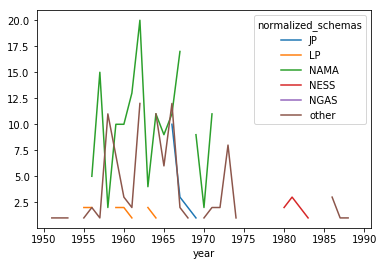

In [43]:
subjects_per_schema.query('1950 < index <1992')['Prs_achternaam']['administration'].plot()


In [44]:
subjects_per_schema = subjects_per_schema.query('1950 < index <1992')
subjects_per_schema.fillna('', inplace=True)
pa = subjects_per_schema['Prs_achternaam'].columns
res = {}
for item in range(len(pa.levels[0])):
    df = subjects_per_schema['Prs_achternaam'][pa.levels[0][item]]
    display(HTML("<h2>{}</h2>".format(pa.levels[0][item])))
    display(HTML(df.to_html()))
    

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,,,,,1
1952,,,,,,1
1953,,,,,,1
1954,,,,,,
1955,,2,,,1,1
1956,,2,5,,,2
1957,,,15,,,1
1958,,,2,,,11
1959,,2,10,,2,7


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,1
1953,,,,,,,
1954,,2,,,,,3
1955,,6,4,,16,,1
1956,,7,9,,,,11
1957,,8,9,,,,11
1958,,3,1,,,,9
1959,,8,9,,,,8


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,4
1953,,3,,,4,,5
1954,,12,8,,9,,8
1955,,18,9,,11,,4
1956,,4,56,,,,17
1957,,11,60,,,,12
1958,,16,51,,,,33
1959,,7,46,,1,,21


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,1,,,,1
1952,,,,,,
1953,,1,,,,
1954,,1,1,,1,2
1955,,16,5,,5,13
1956,,2,10,,,6
1957,,1,25,,4,2
1958,,4,30,,,28
1959,,6,19,,,10


normalized_schemas,JP,LP,NAMA,NGAS,other
year,,,,,
1951,,,,,
1952,,,,,
1953,,,,,
1954,,2,2,2,
1955,,,,,4
1956,,,2,,
1957,,,2,,1
1958,,1,16,,7
1959,,,6,,1


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,,,,,
1952,,,,,,1
1953,,,,,2,
1954,,2,4,,4,1
1955,,7,8,,3,2
1956,,1,26,,2,5
1957,,1,13,,,8
1958,,,7,,2,3
1959,,5,15,,,6


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,2
1953,,3,,,,,4
1954,,6,3,,1,,8
1955,,31,12,,11,,15
1956,,6,14,,11,,11
1957,,11,29,,2,1,16
1958,,10,51,,2,,41
1959,,15,38,,,,19


normalized_schemas,JP,NAMA,NESS,NGAS,other
year,,,,,
1951,,,,,
1952,,,,,
1953,,,,,
1954,,,,,
1955,,,,,1
1956,,,,,
1957,,1,,,2
1958,,4,,,2
1959,,,,,


In [45]:
cols = subjects_per_schema['Prs_achternaam'].columns
levels = cols.levels[0]
len(levels)

8

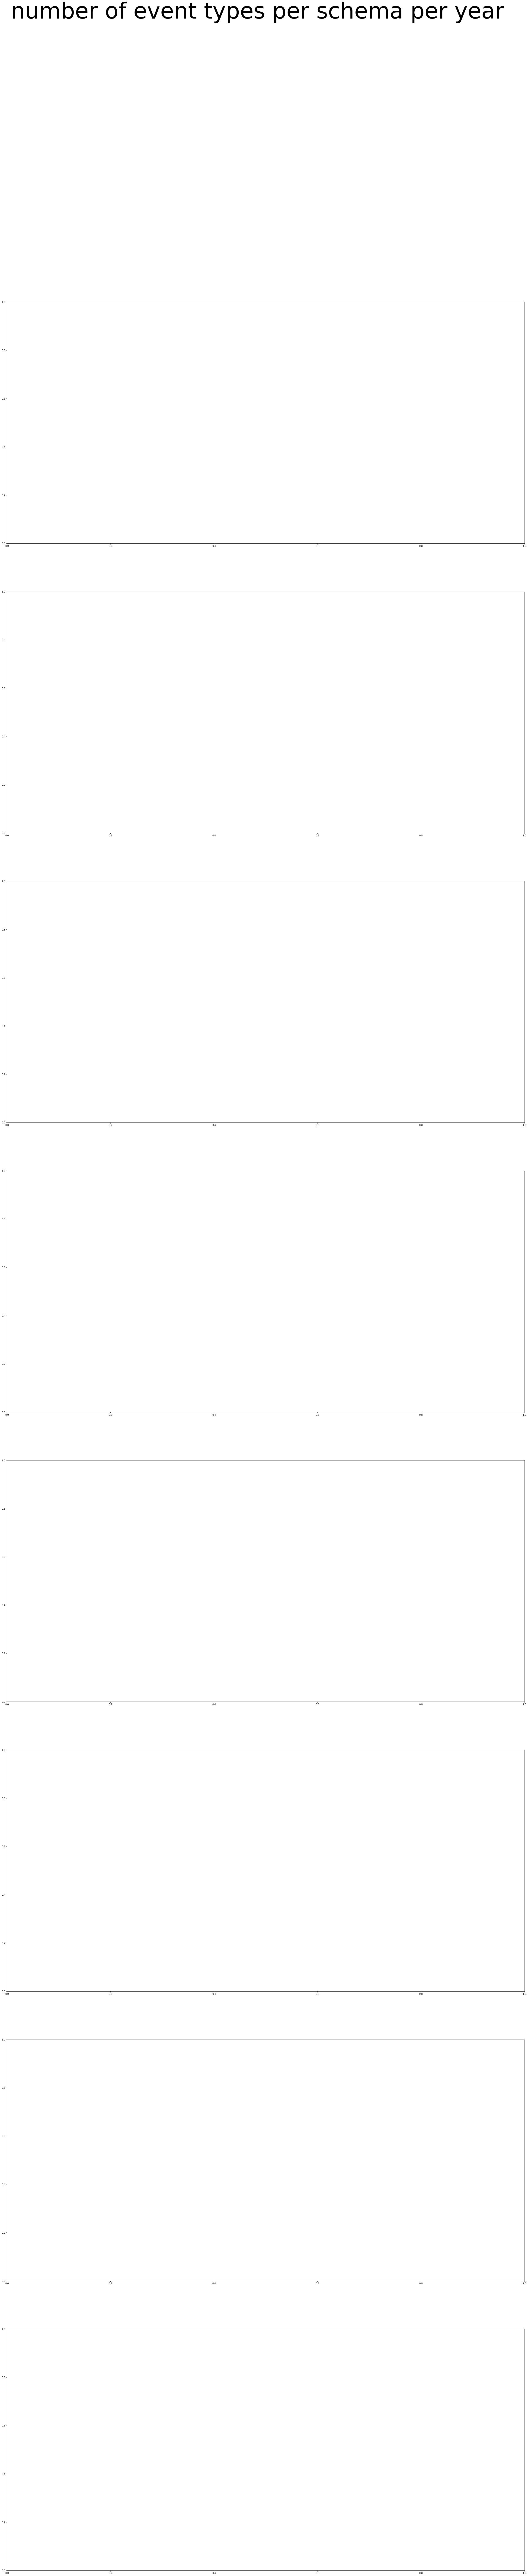

In [46]:
fig, axs = plt.subplots(int(len(levels)), 1, figsize=(40, 180)) # adjust the geometry based on your number of columns to plot

fig.suptitle("number of event types per schema per year",fontsize=96)


for ax,k in zip(axs.flatten(), range(len(levels))):
    try:
        if k != np.nan:
            df = subjects_per_schema['Prs_achternaam'][pa.levels[0][k]]
            df.plot.line(ax=ax)
            ax.set_ylim(0, 80) # for comparable plots
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('event type/schema for {}'.format(pa.levels[0][k]), fontsize=48)
            ax.legend(fontsize='xx-large')
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass


## Consulate-migrant interactions and migrant schemes - analysis

Most of the activities mostly follow the general distribution over the different migrant schemas, which means that the migrants that travelled under the NAMA schema were most prominent in most different activities. The exceptions are the time around 1965 when the JP schema was important and the 1980s when NAMA had stopped and other, smaller schemas had taken over. (XXX schemas uitwerken)

In [47]:
subjects_per_density = spm2.pivot_table(index=['year'], 
                                               columns=['n_events', 'normalized_score'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_density = subjects_per_density.query('1950 < index <1992')
subjects_per_density.fillna('', inplace=True)
subjects_per_density

#this is a nice table, but I cannot see what this would mean.

Prs_achternaam                                                \
n_events         administration                          consular tasks         
normalized_score          dense empty large medium small          dense empty   
year                                                                            
1951                                1                                           
1953                                                                            
1954                                                                        2   
1955                          3                  1                    6     3   
1956                                3            1     2             12     1   
1957                         14           1            1             19     5   
1958                          9     2     2                           3     6   
1959                         11     2     2      2     4             21         
1960                         14           1                          10     3   
1961                         14           1                          18     4   
1962                         18           2           12             26     2   
1963                          6                                       9     3   
1964                         32                                      55     2   
1965                         12           3                          21     1   
1966                         29           3      1                   10     1   
1967                         21           1                           6     1   
1968                          3                                      14     6   
1969                          8           1      1                    7     1   
1970                          2                        1             17         
1971                         11                  2     1             27     2   
1972                          2                                       5     1   
1973                         14                  1                    7     6   
1974                                                                 14     1   
1975                                                                  2         
1976                                                                            
1977                                                                            
1978                                                   1                        
1979                         13           1                          17     5   
1980                                      1            1              4     2   
1981                          2           1            1              6     2   
1982                          2                                       2     4   
1983                                1     3                                 5   
1984                                                                  2     4   
1985                          4                                       4         
1986                                                   3                        
1987                                                   1                    3   
1988                                1                  1                        
1989                                2                                           
1991                                                                            

                                     ...                                 \
n_events                             ...  social assistance               
normalized_score large medium small  ...              dense empty large   
year                                 ...                                  
1951                                 ...                                  
1953                                 ...                                  
1954                                 ...                  2     3         
1955    

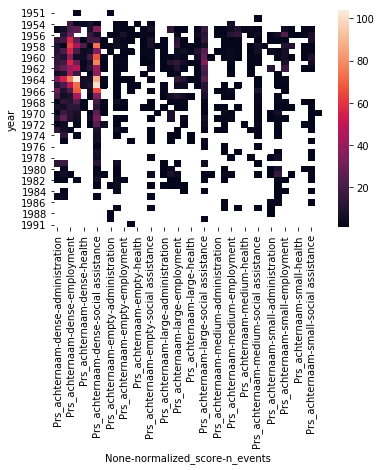

In [48]:
density_per_subject = spm2.pivot_table(index=['year'], 
                                               columns=['normalized_score', 'n_events'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
density_per_subject = density_per_subject.query('1950 < index <1992')
density_per_subject
sns.heatmap(density_per_subject)

In [49]:
cols = subjects_per_density['Prs_achternaam'].columns
levels = cols.levels[0]
levels

Index(['administration', 'consular tasks', 'employment', 'financial', 'health',
       'housing', 'social assistance', 'unknown'],
      dtype='object', name='n_events')

In [50]:

pa = subjects_per_density['Prs_achternaam'].columns
res = {}
for item in range(len(pa.levels[0])):
    df = subjects_per_density['Prs_achternaam'][pa.levels[0][item]]
    display(HTML("<h2>{}</h2>".format(pa.levels[0][item])))
    display(HTML(df.to_html()))

normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,1,,,
1953,,,,,
1954,,,,,
1955,3,,,1,
1956,,3,,1,2
1957,14,,1,,1
1958,9,2,2,,
1959,11,2,2,2,4
1960,14,,1,,


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,,
1954,,2,,,
1955,6,3,14,1,
1956,12,1,,1,6
1957,19,5,,1,2
1958,3,6,,2,
1959,21,,,1,2
1960,10,3,3,4,1


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,,
1954,18,2,,7,
1955,20,2,1,5,5
1956,28,8,2,12,22
1957,57,3,12,2,1
1958,64,4,16,2,11
1959,56,2,5,4,7
1960,38,1,5,4,6


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,2,,,,
1953,,,,,
1954,2,,,,
1955,24,3,1,10,1
1956,,1,,15,2
1957,26,1,1,3,
1958,44,,1,2,10
1959,20,2,6,3,
1960,6,,3,1,1


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,,
1954,4,2,,,
1955,,,,3,
1956,,1,,,1
1957,2,,,,
1958,21,,2,,
1959,5,,2,,
1960,5,,,,


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,,
1954,8,,,,
1955,8,3,2,4,2
1956,16,3,5,2,3
1957,18,1,1,,
1958,2,2,3,1,1
1959,7,3,10,1,1
1960,19,1,7,2,1


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,1,
1954,2,3,,,
1955,35,6,16,1,2
1956,7,2,12,5,8
1957,19,8,14,2,8
1958,74,8,6,7,1
1959,34,3,23,7,2
1960,67,4,27,2,9


normalized_score,dense,empty,large,medium,small
year,,,,,
1951,,,,,
1953,,,,,
1954,,,,,
1955,,,,,
1956,,,,,
1957,2,,,,
1958,2,1,,3,
1959,,,,,
1960,4,,1,,


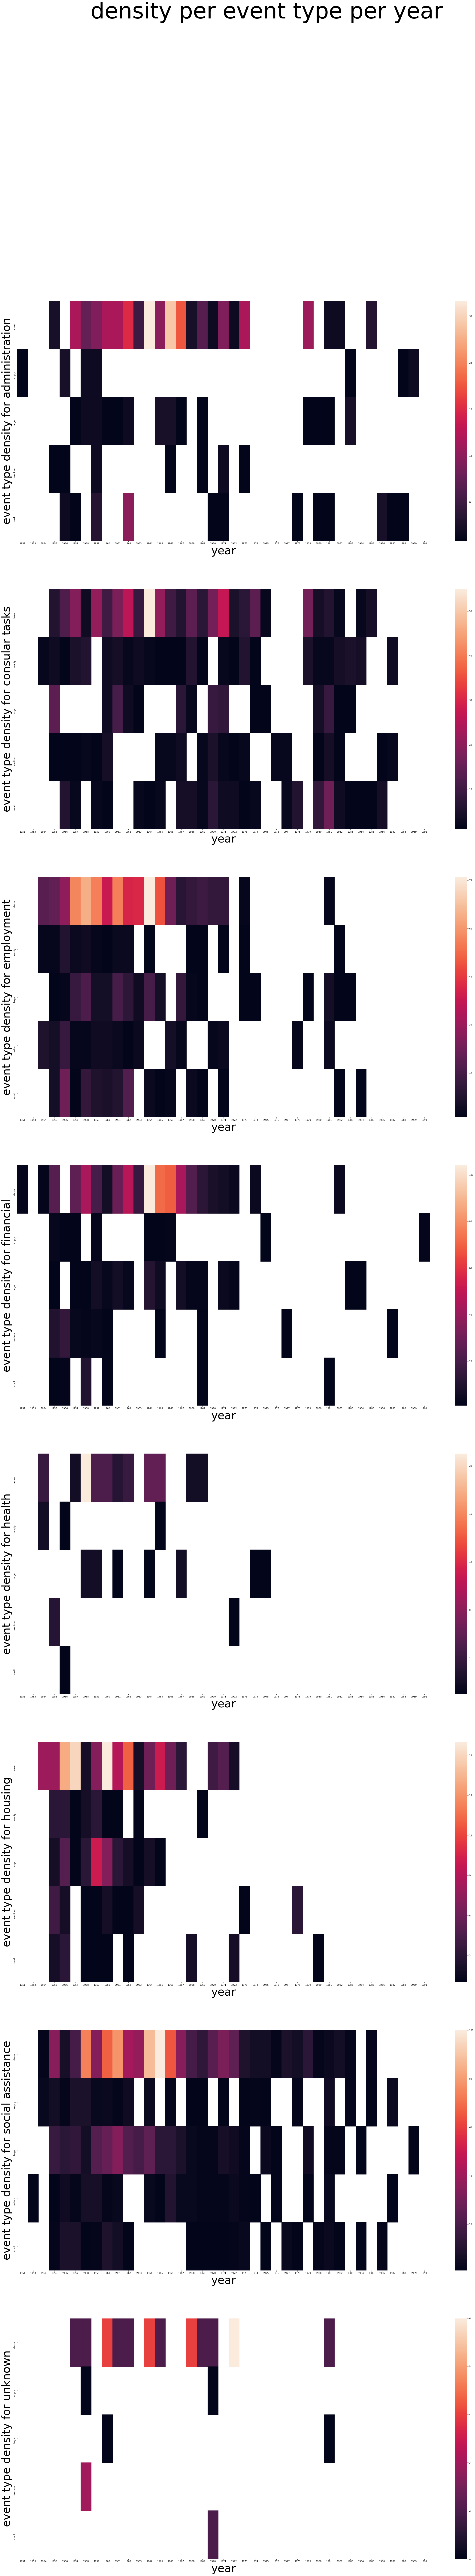

In [51]:
subjects_per_density = spm2.pivot_table(index=['year'], 
                                               columns=['n_events', 'normalized_score'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_density = subjects_per_density.query('1950 < index <1992')
cols = subjects_per_density['Prs_achternaam'].columns
levels = cols.levels[0]

fig, axs = plt.subplots(int(len(levels)), 1, figsize=(40, 180)) # adjust the geometry based on your number of columns to plot
fig.suptitle("density per event type per year",fontsize=96)
#sns.heatmap(subjects_per_density)

for ax,k in zip(axs.flatten(), range(len(levels))):
    try:
        if k != np.nan:
            df = subjects_per_density['Prs_achternaam'][levels[k]]
            df = df.transpose()
            sns.heatmap(df, ax=ax)
#            ax.set_ylim(0, 80) # for comparable plots
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('event type density for {}'.format(pa.levels[0][k]), fontsize=48)
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass


## Consulate-migrant interaction and card density - analysis

As was to be expected, most events concentrate on the large and the dense cards, but the consular tasks tend to be a bit more distributed over categories, probably because it was the type of service all types of migrants required from the consulates. On the other hand, both social assistence and employment help were services so common that they would appear on cards of all densities. Here, it is more clear that health issues concentrated mainly in the late 1950s. Possibly migrants often turned to other institutions when they had health problems. 

In [52]:
subjects_per_schema_density = spm2.pivot_table(index=['year'], 
                                               columns=['n_events', 'normalized_schemas', 'normalized_score'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_schema_density = subjects_per_schema_density.query('1950 < index <1992')
subjects_per_schema_density.fillna('', inplace=True)
subjects_per_schema_density

Prs_achternaam                                             \
n_events           administration                                              
normalized_schemas             JP          LP                           NAMA   
normalized_score            dense large dense empty large medium small dense   
year                                                                           
1951                                                                           
1953                                                                           
1954                                                                           
1955                                        2                                  
1956                                                                 1         
1957                                                                      14   
1958                                                                       2   
1959                                        1     1                        7   
1960                                        2                              9   
1961                                                                      12   
1962                                                                      14   
1963                                        2                              4   
1964                            9           1                             11   
1965                                                                       7   
1966                           10                                         11   
1967                            3                                         16   
1968                            2                                              
1969                                  1                                    8   
1970                                                                       2   
1971                                                           1          10   
1972                                                                           
1973                                                           1           6   
1974                                                                           
1975                                                                           
1976                                                                           
1977                                                                           
1978                                                                           
1979                                                                       7   
1980                                                                           
1981                                                                           
1982                                                                           
1983                                              1     2                      
1984                                                                           
1985                                                                           
1986                                                                           
1987                                                                           
1988                                                                           
1989                                              2                            
1991                                                                           

                                ...                                           \
n_events                        ...   unknown                                  
normalized_schemas              ...      NAMA                           NESS   
normalized_score   empty large  ...     dense empty large medium small dense   
year                            ...                                            
1951                            ...                                            
1953              

In [53]:
cols = subjects_per_schema_density['Prs_achternaam'].columns
levels = cols.levels[0]
len(levels)

8

In [54]:
pa = subjects_per_schema_density['Prs_achternaam'].columns
res = {}
for item in range(len(pa.levels[0])):
    df = subjects_per_schema['Prs_achternaam'][pa.levels[0][item]]
    display(HTML("<h2>{}</h2>".format(pa.levels[0][item])))
    display(HTML(df.to_html()))

normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,,,,,1
1952,,,,,,1
1953,,,,,,1
1954,,,,,,
1955,,2,,,1,1
1956,,2,5,,,2
1957,,,15,,,1
1958,,,2,,,11
1959,,2,10,,2,7


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,1
1953,,,,,,,
1954,,2,,,,,3
1955,,6,4,,16,,1
1956,,7,9,,,,11
1957,,8,9,,,,11
1958,,3,1,,,,9
1959,,8,9,,,,8


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,4
1953,,3,,,4,,5
1954,,12,8,,9,,8
1955,,18,9,,11,,4
1956,,4,56,,,,17
1957,,11,60,,,,12
1958,,16,51,,,,33
1959,,7,46,,1,,21


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,1,,,,1
1952,,,,,,
1953,,1,,,,
1954,,1,1,,1,2
1955,,16,5,,5,13
1956,,2,10,,,6
1957,,1,25,,4,2
1958,,4,30,,,28
1959,,6,19,,,10


normalized_schemas,JP,LP,NAMA,NGAS,other
year,,,,,
1951,,,,,
1952,,,,,
1953,,,,,
1954,,2,2,2,
1955,,,,,4
1956,,,2,,
1957,,,2,,1
1958,,1,16,,7
1959,,,6,,1


normalized_schemas,JP,LP,NAMA,NESS,NGAS,other
year,,,,,,
1951,,,,,,
1952,,,,,,1
1953,,,,,2,
1954,,2,4,,4,1
1955,,7,8,,3,2
1956,,1,26,,2,5
1957,,1,13,,,8
1958,,,7,,2,3
1959,,5,15,,,6


normalized_schemas,JP,LP,NAMA,NESS,NGAS,NGSS,other
year,,,,,,,
1951,,,,,,,
1952,,,,,,,2
1953,,3,,,,,4
1954,,6,3,,1,,8
1955,,31,12,,11,,15
1956,,6,14,,11,,11
1957,,11,29,,2,1,16
1958,,10,51,,2,,41
1959,,15,38,,,,19


normalized_schemas,JP,NAMA,NESS,NGAS,other
year,,,,,
1951,,,,,
1952,,,,,
1953,,,,,
1954,,,,,
1955,,,,,1
1956,,,,,
1957,,1,,,2
1958,,4,,,2
1959,,,,,


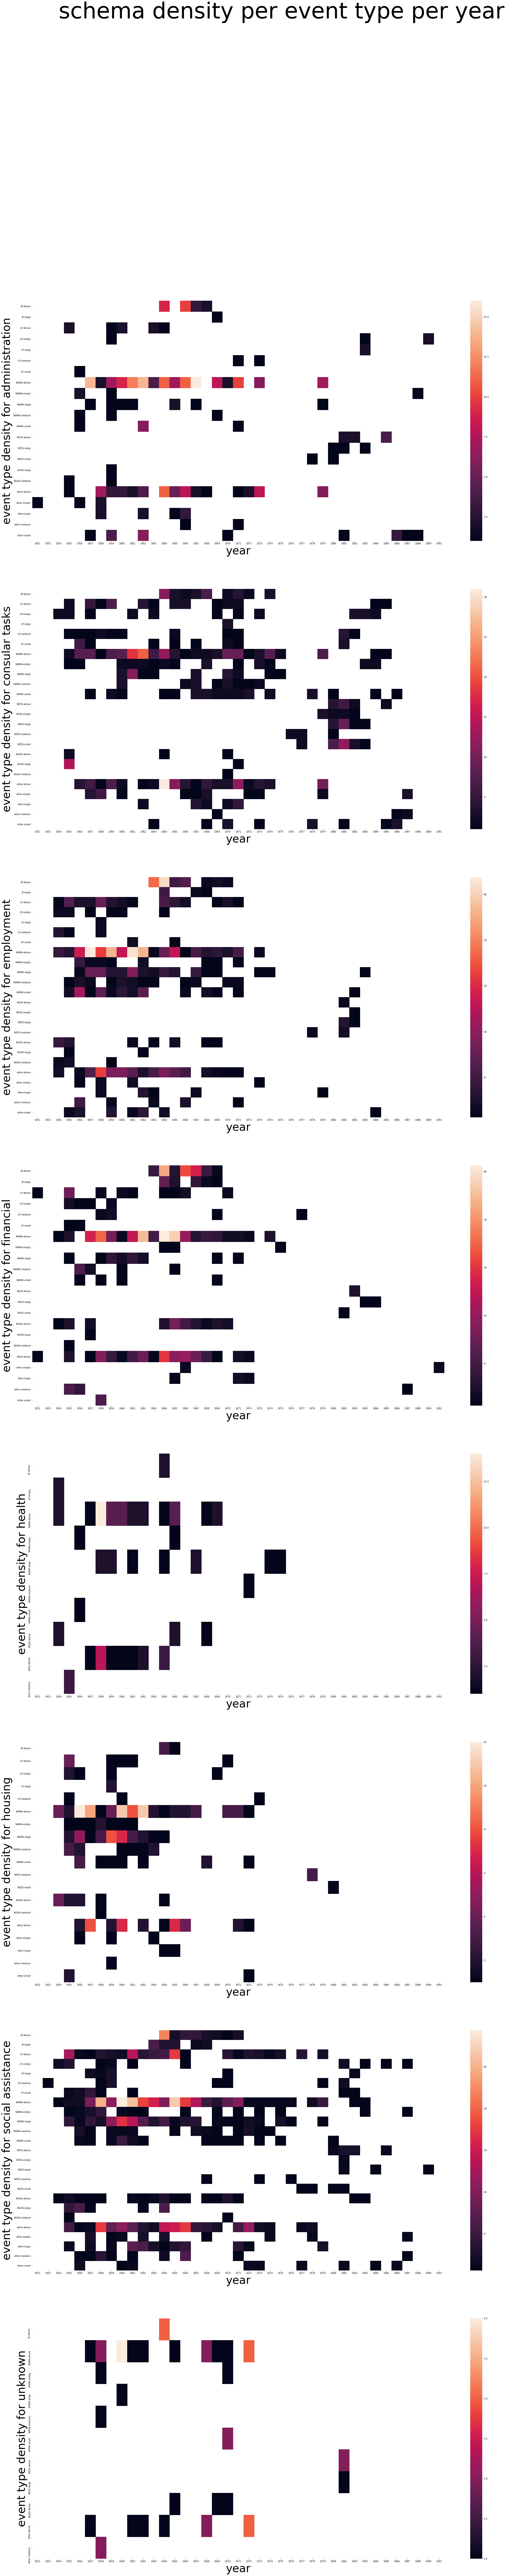

In [55]:
subjects_per_schema_density = spm2.pivot_table(index=['year'], 
                                               columns=['n_events', 'normalized_schemas', 'normalized_score'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_schema_density = subjects_per_schema_density.query('1950 < index <1992')
cols = subjects_per_schema_density['Prs_achternaam'].columns
levels = cols.levels[0]

fig, axs = plt.subplots(int(len(levels)), 1, figsize=(40, 180)) # adjust the geometry based on your number of columns to plot
fig.suptitle("schema density per event type per year",fontsize=96)
#sns.heatmap(subjects_per_density)

for ax,k in zip(axs.flatten(), range(len(levels))):
    try:
        if k != np.nan:
            df = subjects_per_schema_density['Prs_achternaam'][levels[k]]
            df = df.transpose()
            sns.heatmap(df, ax=ax)
#            ax.set_ylim(0, 80) # for comparable plots
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('event type density for {}'.format(pa.levels[0][k]), fontsize=48)
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass

# I don't think this adds much except for a lot of complexity :-(

In [56]:
spm3 = events.set_index('migrant').join(scored_m.set_index('persoonsId'),  how='inner')

spm3 = spm3[['Prs_achternaam', 'n_events', 'year', 'normalized_religion', 'normalized_samenstelling', 'normalized_score']]
spm3


,Prs_achternaam,n_events,year,normalized_religion,normalized_samenstelling,normalized_score
1,Aafjes,NaN,NaN,unknown,Alone,NaN
96,Acquoy,consular tasks,1955,protestant,Couple,empty
96,Acquoy,social assistance,1955,protestant,Couple,empty
96,Acquoy,administration,1956,protestant,Couple,empty
96,Acquoy,health,1956,protestant,Couple,empty
96,Acquoy,employment,1956,protestant,Couple,empty
96,Acquoy,employment,1957,protestant,Couple,empty
96,Acquoy,social assistance,1960,protestant,Couple,empty
96,Acquoy,financial,1964,protestant,Couple,empty
178,Haan,social assistance,1960,protestant,Alone,large


In [57]:
subjects_per_religion = spm2.pivot_table(index=['year'], 
                                               columns=['n_events', 'normalized_religion'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_religion = subjects_per_schema_density.query('1950 < index <1992')
subjects_per_religion.fillna('', inplace=True)
subjects_per_religion

Prs_achternaam                                             \
n_events           administration                                              
normalized_schemas             JP          LP                           NAMA   
normalized_score            dense large dense empty large medium small dense   
year                                                                           
1951                                                                           
1953                                                                           
1954                                                                           
1955                                        2                                  
1956                                                                 1         
1957                                                                      14   
1958                                                                       2   
1959                                        1     1                        7   
1960                                        2                              9   
1961                                                                      12   
1962                                                                      14   
1963                                        2                              4   
1964                            9           1                             11   
1965                                                                       7   
1966                           10                                         11   
1967                            3                                         16   
1968                            2                                              
1969                                  1                                    8   
1970                                                                       2   
1971                                                           1          10   
1972                                                                           
1973                                                           1           6   
1974                                                                           
1975                                                                           
1976                                                                           
1977                                                                           
1978                                                                           
1979                                                                       7   
1980                                                                           
1981                                                                           
1982                                                                           
1983                                              1     2                      
1984                                                                           
1985                                                                           
1986                                                                           
1987                                                                           
1988                                                                           
1989                                              2                            
1991                                                                           

                                ...                                           \
n_events                        ...   unknown                                  
normalized_schemas              ...      NAMA                           NESS   
normalized_score   empty large  ...     dense empty large medium small dense   
year                            ...                                            
1951                            ...                                            
1953              

In [58]:
pa = subjects_per_religion['Prs_achternaam'].columns
res = {}
for item in range(len(pa.levels[0])):
    df = subjects_per_religion['Prs_achternaam'][pa.levels[0][item]]
    display(HTML("<h2>{}</h2>".format(pa.levels[0][item])))
    display(HTML(df.to_html()))

In [59]:
levels

Index(['administration', 'consular tasks', 'employment', 'financial', 'health',
       'housing', 'social assistance', 'unknown'],
      dtype='object', name='n_events')

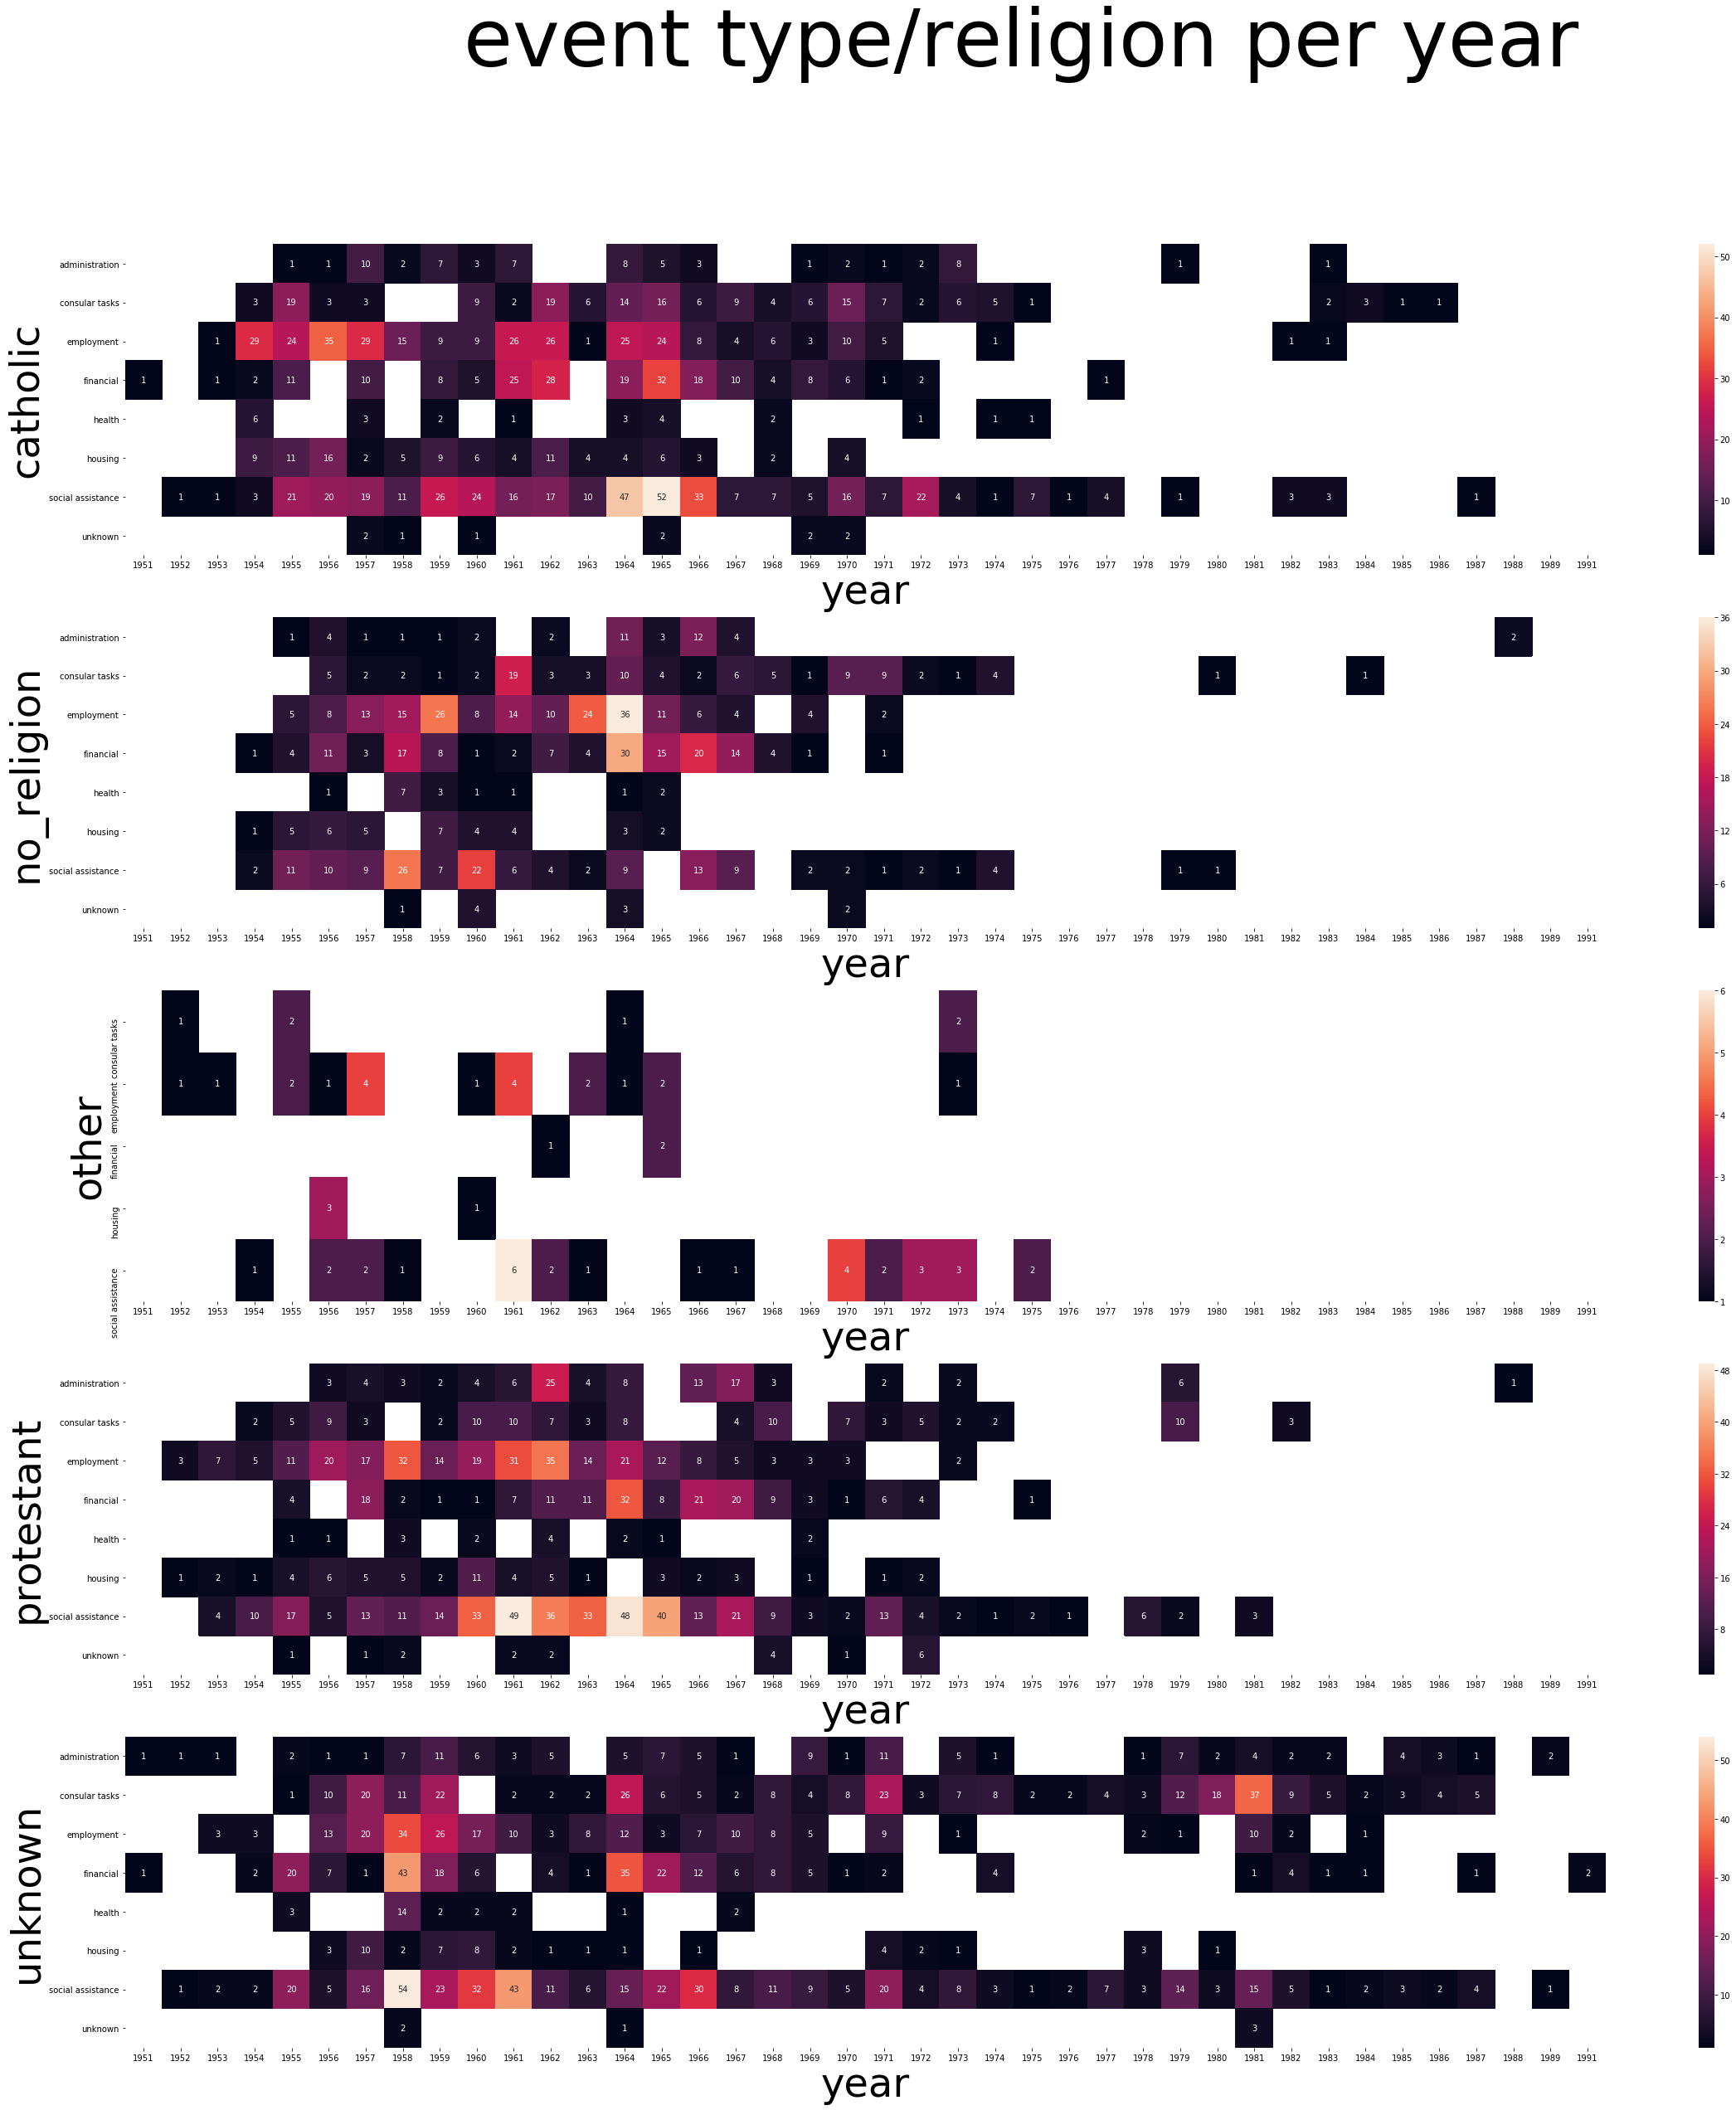

In [60]:
subjects_per_religion = spm2.pivot_table(index=['year'], 
                                               columns=['normalized_religion', 'n_events'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_religion = subjects_per_religion.query('1950 < index <1992')
cols = subjects_per_religion['Prs_achternaam'].columns
levels = cols.levels[0]

fig, axs = plt.subplots(int(len(levels)), 1, figsize=(40, 40)) # adjust the geometry based on your number of columns to plot
fig.suptitle("event type/religion per year",fontsize=96)
#sns.heatmap(subjects_per_density)

for ax,k in zip(axs.flatten(), range(len(levels))):
    try:
        if k != np.nan:
            df = subjects_per_religion['Prs_achternaam'][levels[k]]
            df = df.transpose()
            sns.heatmap(df, annot=True, ax=ax)
#            ax.set_ylim(0, 80) # for comparable plots
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('{}'.format(levels[k]), fontsize=48)
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass


## Consulate-migrant interaction and religion - analysis


The heatmaps above plot the types of consular assistence per religion per year. 

* The main overall shift is from migrants with a religion to migrants with an unregistered religion, mirroring the dwindling importance of religion in the administration (and presumably the dwindling social importance). 
* Employment intervention was more or less equally distributed over all groups. 
* Protestants had less need for social assistence than catholics and migrants with no religion or a missing religious registration

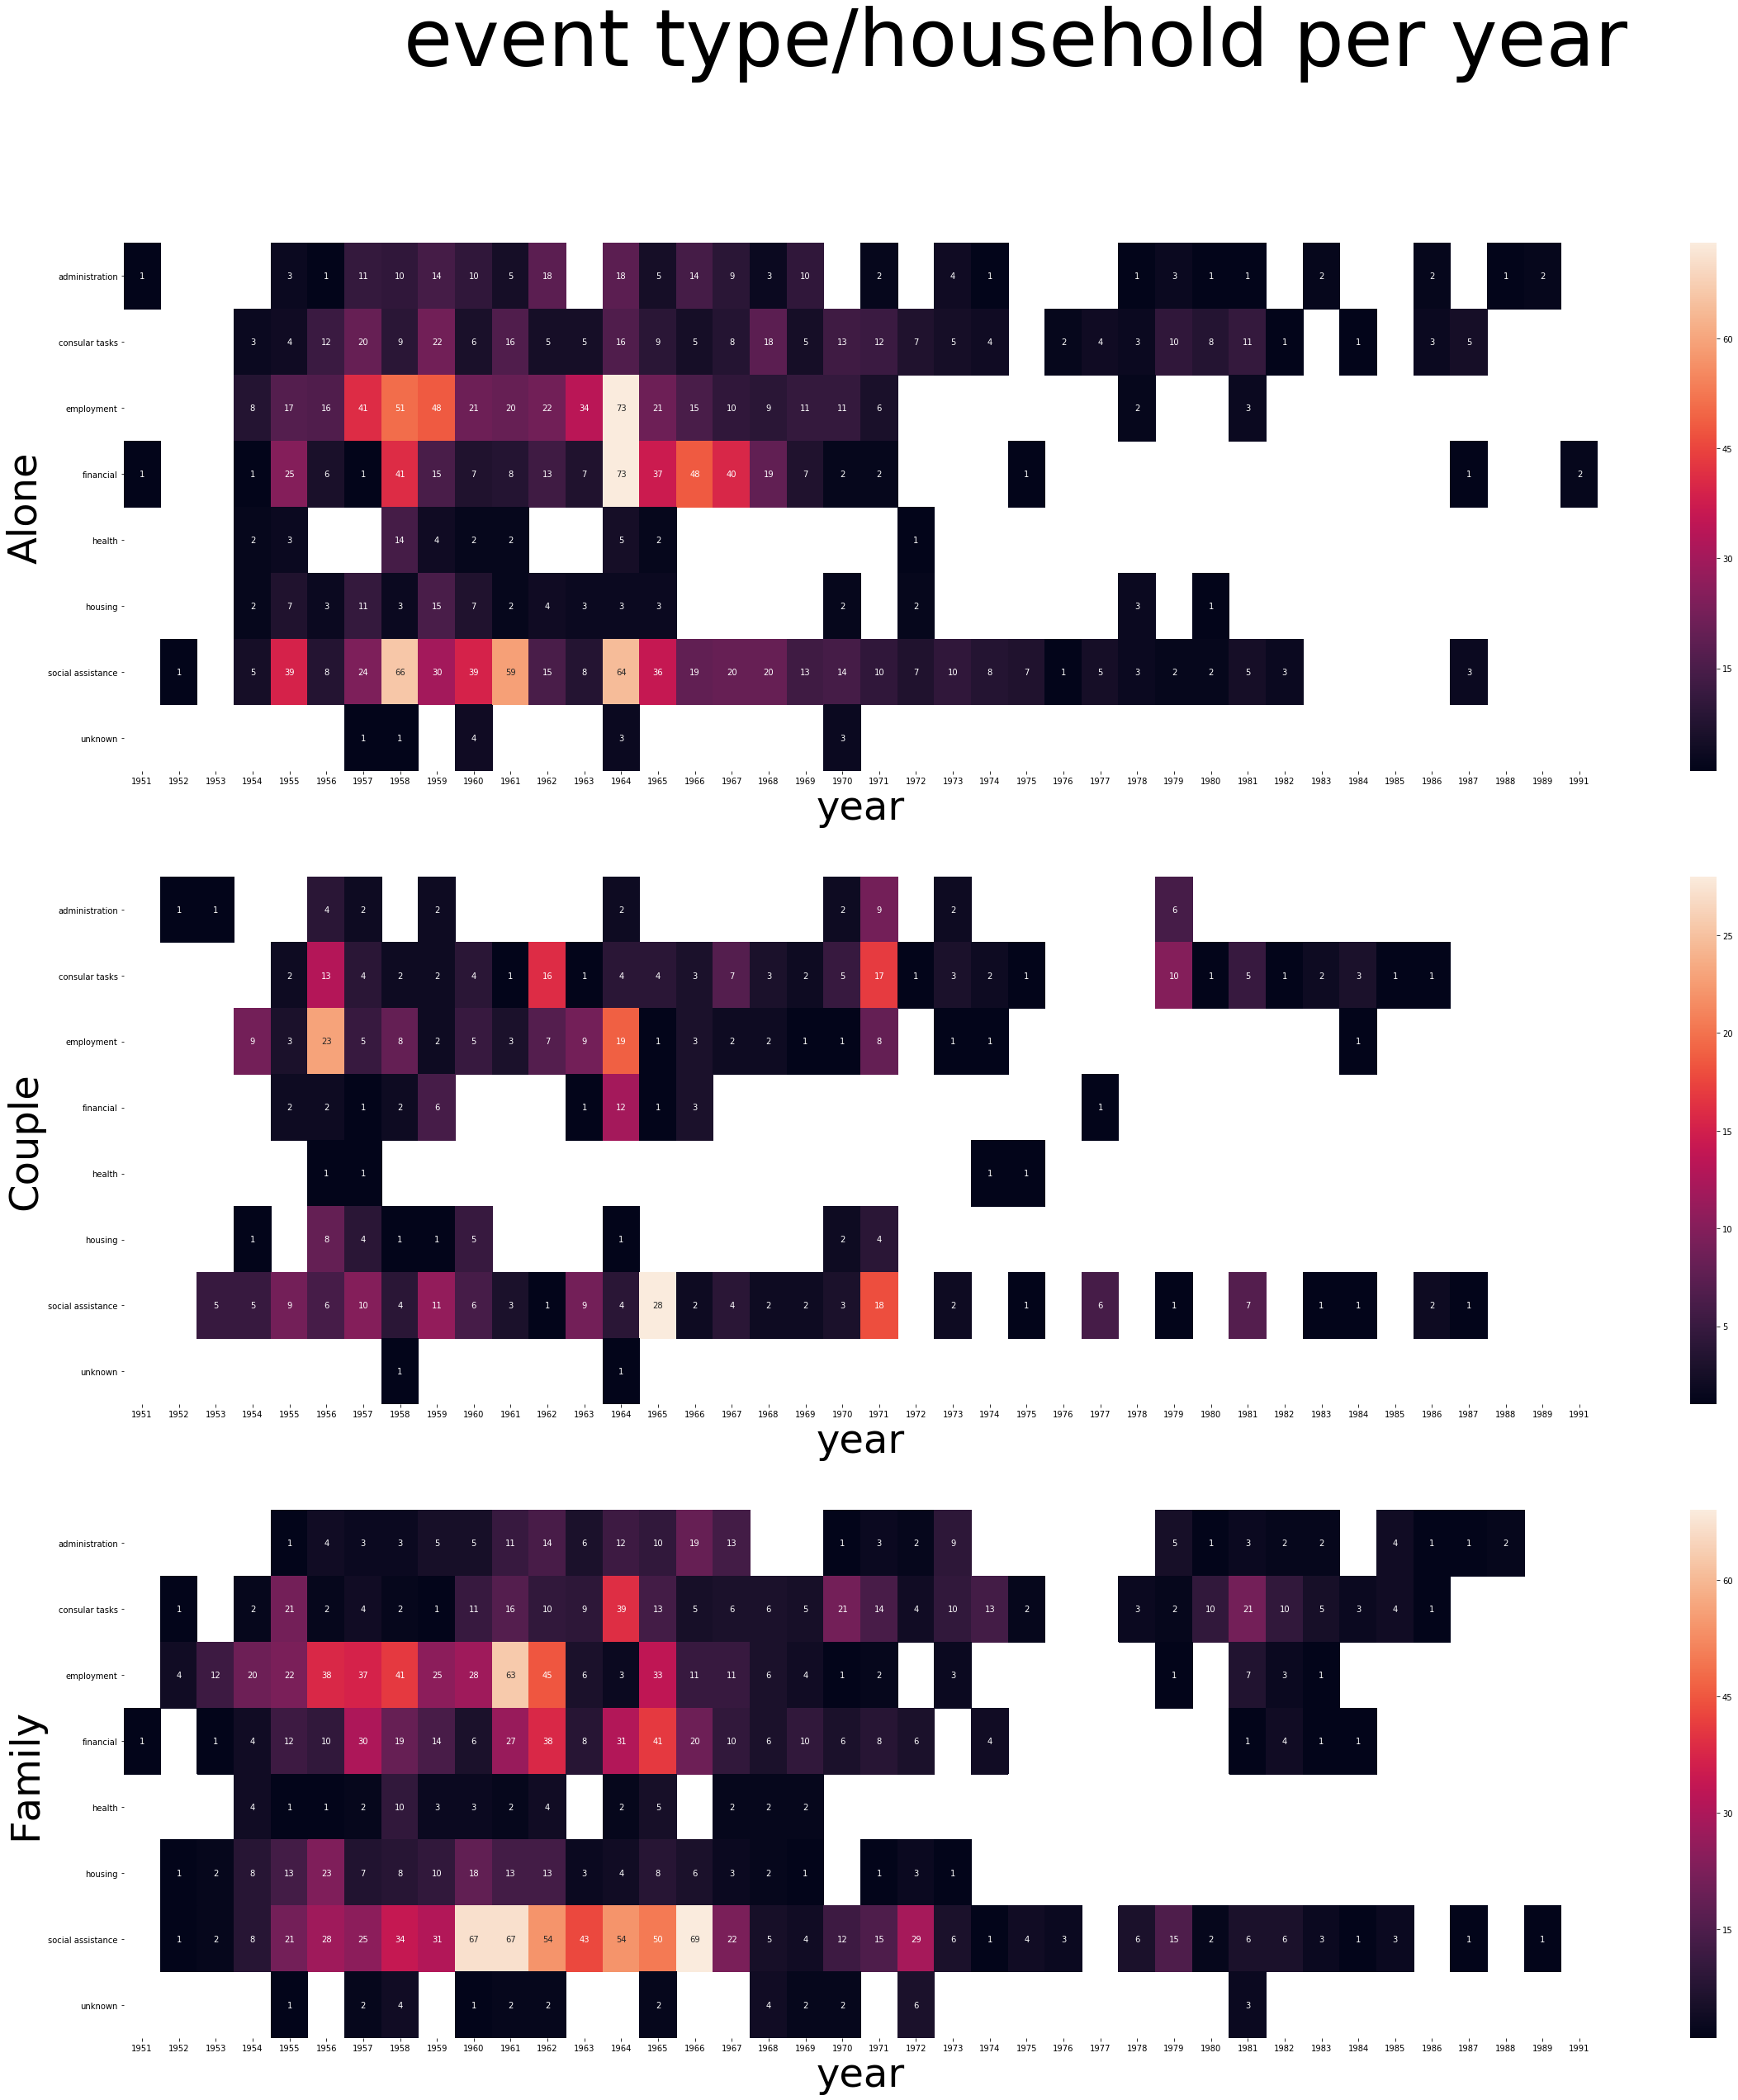

In [61]:
subjects_per_household = spm2.pivot_table(index=['year'], 
                                               columns=['normalized_samenstelling', 'n_events'], 
                                               values=['Prs_achternaam'], 
                                               aggfunc='count')
subjects_per_household = subjects_per_household.query('1950 < index <1992')
cols = subjects_per_household['Prs_achternaam'].columns
levels = cols.levels[0]

fig, axs = plt.subplots(int(len(levels)), 1, figsize=(40, 40)) # adjust the geometry based on your number of columns to plot
fig.suptitle("event type/household per year",fontsize=96)

for ax,k in zip(axs.flatten(), range(len(levels))):
    try:
        if k != np.nan:
            df = subjects_per_household['Prs_achternaam'][levels[k]]
            df = df.transpose()
            sns.heatmap(df, annot=True, ax=ax)
            ax.set_xlabel('year', fontsize=48)
            ax.set_ylabel('{}'.format(levels[k]), fontsize=48)
    except (ValueError, TypeError):  #raised if `y` is empty.
        pass


## consulate-migrant interaction and household type - analysis

* Couples had remarkably few health issues
* Couples were also under represented in financial issues, while single migrants were over represented, especially in the mid-1960. (XXX can this be attributed to the financial saving organization of some of the schemas?)

## time lag between year of travel and year of first event

In [62]:
subjects_per_migrant.columns

MultiIndex(levels=[['Prs_achternaam'], ['administration', 'consular tasks', 'employment', 'financial', 'health', 'housing', 'social assistance', 'unknown']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]],
           names=[None, 'n_events'])

In [63]:
events.year.min(level=0).index


Index(['4_1705', '31_0899', '46_1617', '2_1483', '33_1973', '21_0709',
       '21_2221', '6_0975', '34_2121', '24_2011',
       ...
       '17_1609', '39_2201', '40_1401', '40_1601', '40_1799', '40_1801',
       '40_2001', '40_2201', '41_0001', '41_0201'],
      dtype='object', length=711)

In [64]:
spm_y = events.set_index('migrant').join(scored_m.set_index('persoonsId'),  how='inner')
spm_y= spm_y[['Prs_achternaam', 'n_events', 'year', 'reis']]
spm_y.drop(spm_y.query('reis == 0').index, axis=0, inplace=True)
spm_y.head()

,Prs_achternaam,n_events,year,reis
96,Acquoy,consular tasks,1955,1955
96,Acquoy,social assistance,1955,1955
96,Acquoy,administration,1956,1955
96,Acquoy,health,1956,1955
96,Acquoy,employment,1956,1955


In [65]:
spm_y_r = spm_y.reset_index()
spm_y_r.columns

Index(['index', 'Prs_achternaam', 'n_events', 'year', 'reis'], dtype='object')

In [66]:
spm_y["year"].min(level=0).index

Int64Index([   96,   178,   321,   405,   433,   531,   624,   720,   819,
              919,
            ...
            50328, 50426, 50561, 50585, 50854, 50947, 51043, 51137, 51234,
            51330],
           dtype='int64', length=369)

In [67]:
spm_y_r_c = spm_y_r.loc[spm_y_r.index.isin(spm_y["year"].min(level=0).index)] #apparently this is the way to do this selection

In [68]:
spm_y_r_c


,index,Prs_achternaam,n_events,year,reis
96,1213,Beers,health,1967,1967
178,1967,Blaauw,financial,1959,1951
321,3710,Claes,financial,1962,1963
405,4612,Dolder,employment,1957,1957
433,4612,Dolder,social assistance,1960,1957
531,4928,Duijn,consular tasks,1955,1964
624,4928,Duijn,health,1965,1964
720,5027,Durlinger,administration,1983,1982
819,5918,Fuijkschot,administration,1967,1966
919,6255,Haisma,employment,1984,1962


In [69]:
spm_y_r_c['timelag'] = spm_y_r_c.year - spm_y_r_c.reis

/Users/rikhoekstra/anaconda/envs/36/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
spm_y_r_c.timelag.mean()


2.5128205128205128

In [71]:
spm_y_r_c.timelag.median()

1.0

In [72]:
spm_y_r_c.timelag.min()


-9

In [73]:
spm_y_r_c.timelag.max()

22

In [74]:
spm_y_r_c.query('timelag < 0')

,index,Prs_achternaam,n_events,year,reis,timelag
321,3710,Claes,financial,1962,1963,-1
531,4928,Duijn,consular tasks,1955,1964,-9
1536,12038,Leonard,social assistance,1961,1964,-3
1967,24383,Buitendijk,housing,1957,1964,-7


In [75]:
spm_y["year"].max(level=0)

96       1964.0
178      1961.0
321      1955.0
405      1956.0
433      1974.0
531      1958.0
624      1957.0
720      1979.0
819      1971.0
919      1979.0
956         NaN
1116     1960.0
1123     1982.0
1213     1971.0
1307     1962.0
1340     1955.0
1439     1964.0
1536     1975.0
1726     1955.0
1870     1973.0
1967     1959.0
2218     1975.0
2315     1969.0
2522     1964.0
2717     1954.0
2814     1964.0
2972     1956.0
3053     1985.0
3154     1970.0
3313     1958.0
          ...  
48123       NaN
48185       NaN
48310    1964.0
48351       0.0
48502       NaN
48598    1965.0
48697    1956.0
48795    1981.0
48879    1974.0
48975    1964.0
49170    1968.0
49267       NaN
49526    1954.0
49720    1960.0
49752    1963.0
49849    1989.0
49939    1957.0
50037    1986.0
50135       NaN
50231    1962.0
50328    1970.0
50426    1972.0
50561    1969.0
50585    1971.0
50854    1969.0
50947    1991.0
51043    1957.0
51137    1972.0
51234       NaN
51330    1984.0
Name: year, Length: 369,

In [76]:
spm_y["year"].max(level=0).index

Int64Index([   96,   178,   321,   405,   433,   531,   624,   720,   819,
              919,
            ...
            50328, 50426, 50561, 50585, 50854, 50947, 51043, 51137, 51234,
            51330],
           dtype='int64', length=369)

In [77]:
spm_y_r_max = spm_y_r.loc[spm_y_r.index.isin(spm_y["year"].max(level=0).index)]

In [78]:
spm_y_r_max.year - spm_y_r_max.reis # i do not trust these

96       0
178      8
321     -1
405      0
433      3
531     -9
624      1
720      1
819      1
919     22
956      1
1116     0
1123     0
1213     0
1307     0
1340     0
1439     3
1536    -3
1726     1
1870     2
1967    -7
2218     2
2315     6
2522     0
2717     0
2814    15
2972     2
3053     3
3154    15
3313     3
3415     2
3510     4
3617     9
3630     9
3710     1
3731     1
3920     0
4017     2
4116     1
dtype: object

In [79]:
spm_y_r_max.max()

index                         48310
Prs_achternaam                Welle
n_events          social assistance
year                           1984
reis                           1982
dtype: object

In [80]:
spm2.corr()

,Unnamed: 0,key_0,geboortejaar,hasUnit,adresAantal,duplicaten bevatten afwijkende gegevens,Heeft geen correct id,total_score,edges,imnm,imnr,map,front_score,rest_score,id,reis,age
Unnamed: 0,1.000000,0.229893,-0.145087,-0.018014,-0.147184,0.152135,NaN,-0.183901,-0.048799,0.020332,0.020332,-0.032617,-0.119164,-0.170692,0.229893,-0.140397,0.020795
key_0,0.229893,1.000000,-0.238408,-0.115116,-0.164513,0.008445,NaN,0.092089,0.151279,0.008180,0.008180,-0.466956,0.088780,0.078963,1.000000,0.002394,0.201202
geboortejaar,-0.145087,-0.238408,1.000000,0.265549,0.258378,-0.025582,NaN,-0.026681,0.111541,0.005722,0.005722,0.090866,0.078063,-0.046097,-0.238408,0.178147,-0.709088
hasUnit,-0.018014,-0.115116,0.265549,1.000000,0.233627,-0.148010,NaN,-0.011832,0.125731,0.120677,0.120677,0.247507,0.101238,-0.035347,-0.115116,0.106689,-0.145746
adresAantal,-0.147184,-0.164513,0.258378,0.233627,1.000000,-0.192052,NaN,0.168793,0.174086,-0.008630,-0.008630,0.173579,0.269117,0.120937,-0.164513,0.339455,0.026912
duplicaten bevatten afwijkende gegevens,0.152135,0.008445,-0.025582,-0.148010,-0.192052,1.000000,NaN,-0.356208,-0.185470,0.065791,0.065791,-0.145362,-0.299910,-0.308478,0.008445,-0.323834,-0.166533
Heeft geen correct id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_score,-0.183901,0.092089,-0.026681,-0.011832,0.168793,-0.356208,NaN,1.000000,0.235693,-0.129507,-0.129507,-0.100037,0.420029,0.979172,0.092089,0.287184,0.228115
edges,-0.048799,0.151279,0.111541,0.125731,0.174086,-0.185470,NaN,0.235693,1.000000,-0.028963,-0.028963,-0.012430,0.690361,0.098483,0.151279,0.187373,0.040937
imnm,0.020332,0.008180,0.005722,0.120677,-0.008630,0.065791,NaN,-0.129507,-0.028963,1.000000,1.000000,0.143338,0.111412,-0.163905,0.008180,0.032723,0.018660


In [81]:
subjects_per_schema.head()


Prs_achternaam                                            \
n_events           administration                         consular tasks      
normalized_schemas             JP LP NAMA NESS NGAS other             JP LP   
year                                                                          
1951                                                    1                     
1952                                                    1                     
1953                                                    1                     
1954                                                                      2   
1955                               2              1     1                 6   

                              ...                                          \
n_events                      ...  social assistance                        
normalized_schemas NAMA NESS  ...               NAMA NESS NGAS NGSS other   
year                          ...                                           
1951                          ...                                           
1952                          ...                                       2   
1953                          ...                                       4   
1954                          ...                  3         1          8   
1955                  4       ...                 12        11         15   

                                                 
n_events           unknown                       
normalized_schemas      JP NAMA NESS NGAS other  
year                                             
1951                                             
1952                                             
1953                                             
1954                                             
1955                                          1  

[5 rows x 49 columns]